In [1]:
# imports

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os
from env import get_connection

import wrangle as w



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
import sklearn.preprocessing  as skl

In [2]:
# get train, validate, test using wrangle module
train, validate, test = w.wrangle_zillow()
train.shape, validate.shape, test.shape

((1198531, 7), (513657, 7), (428047, 7))

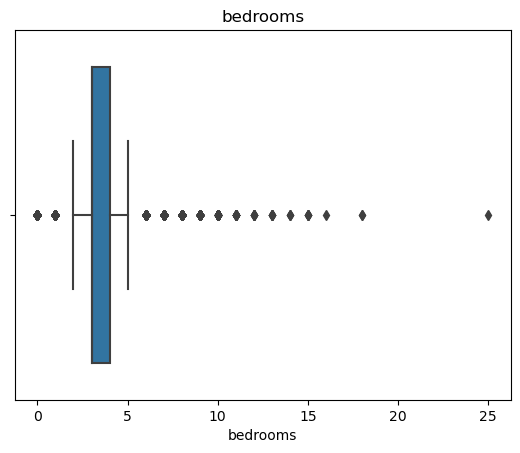

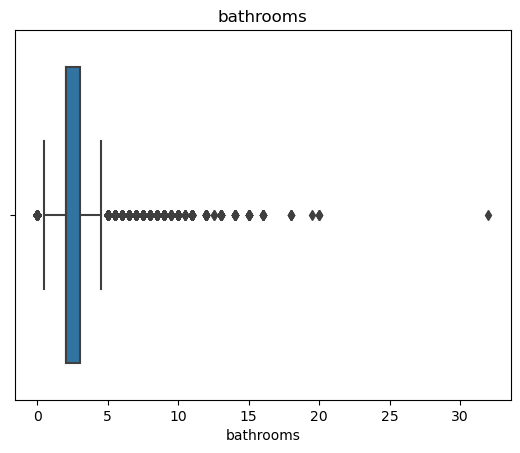

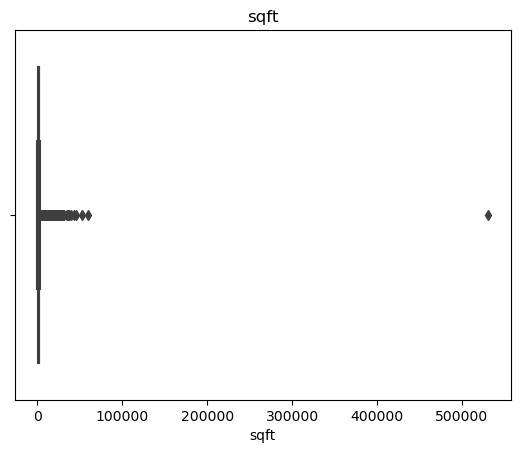

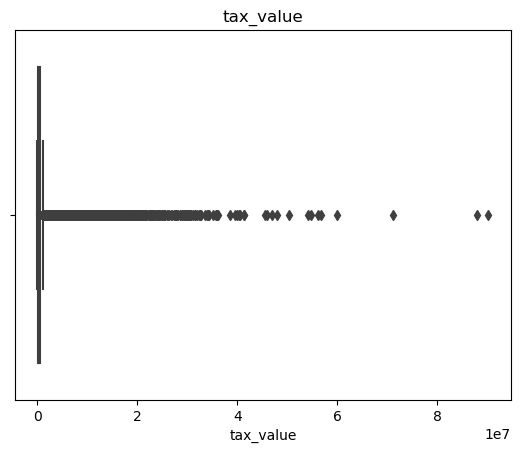

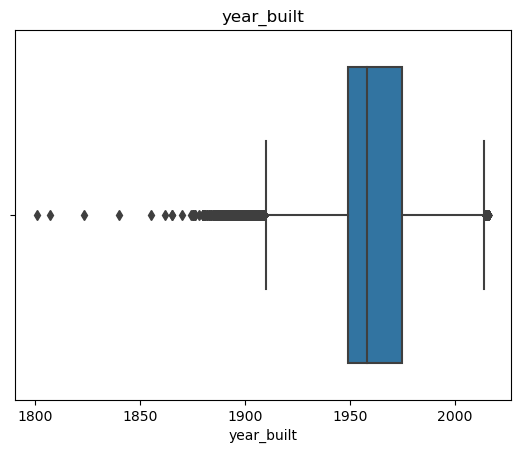

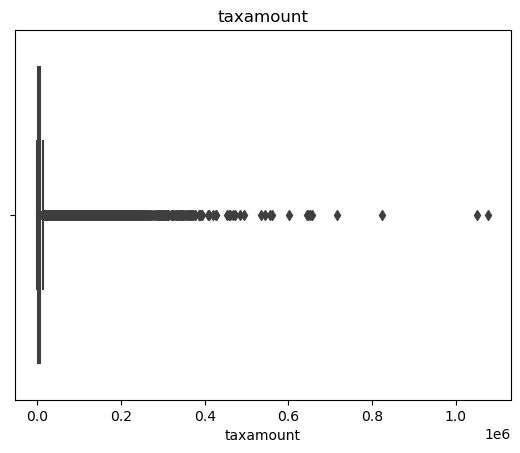

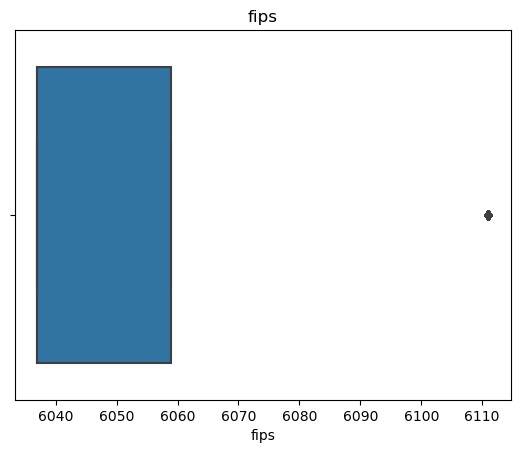

In [3]:
# check for ouliers using boxplot graph
for col in train.columns:
    sns.boxplot(x=col, data=train)
    plt.title(col)
    plt.show()

### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [4]:

def get_scaler(scaler, col):
    '''takes on scaler and column name and show graph of unscaled and scaled data
    '''
    
    
    # fit scaler on train data
    scaler.fit(train[[col]])
    
    # scale data
    scaled = scaler.transform(train[[col]])
    
    # create a new figure using figsize with parameters Width, height in inches
    plt.figure(figsize = (15,5))
    
    # graph position 1 row, 2 columns, 1 index
    plt.subplot(121)
    
    # histograph unnscaled data
    plt.hist(train[col], bins=25)
    
    # title
    plt.title('Original data')

    # graph position 1 row, 2 columns, 2 index
    plt.subplot(122)
    
    # histograph of scaled data
    plt.hist(scaled, bins=25)
    # title
    plt.title('Transformed data')

    # display figure
    plt.show()
      

bedrooms


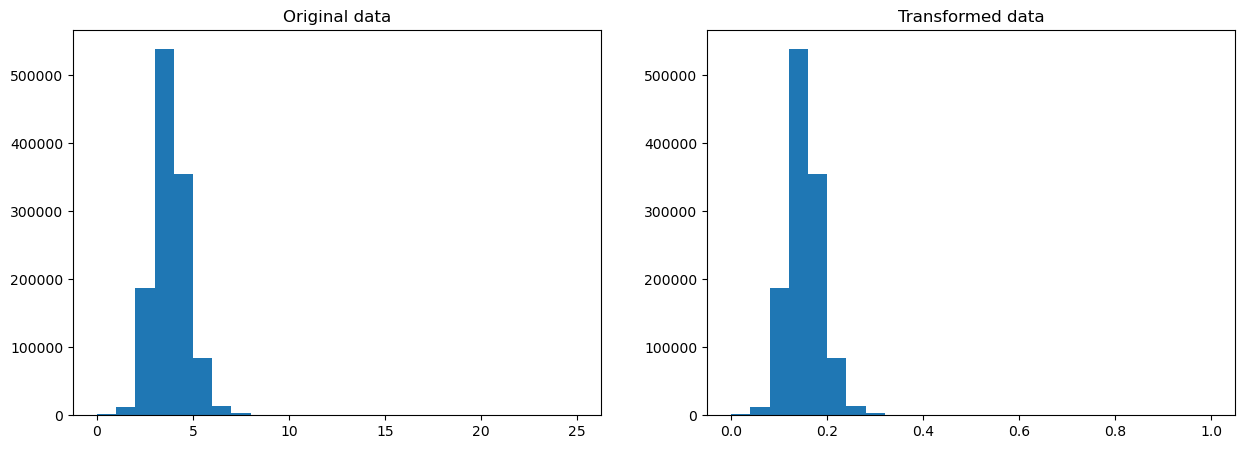



bathrooms


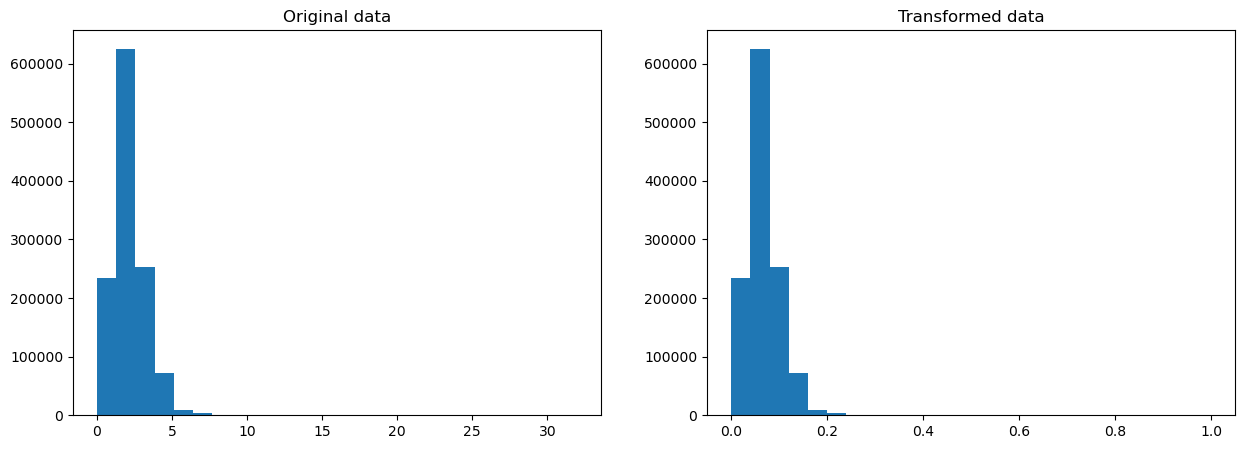



sqft


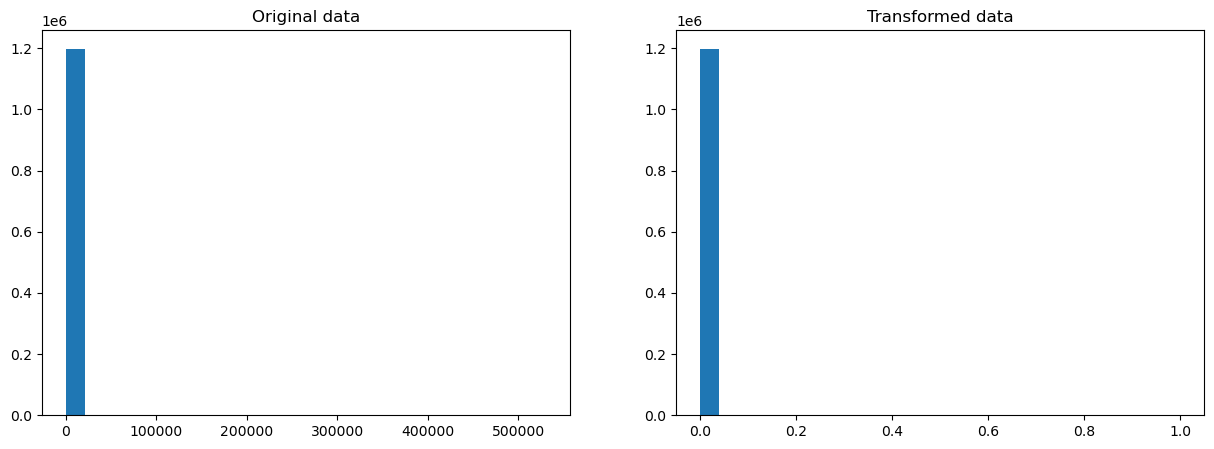



tax_value


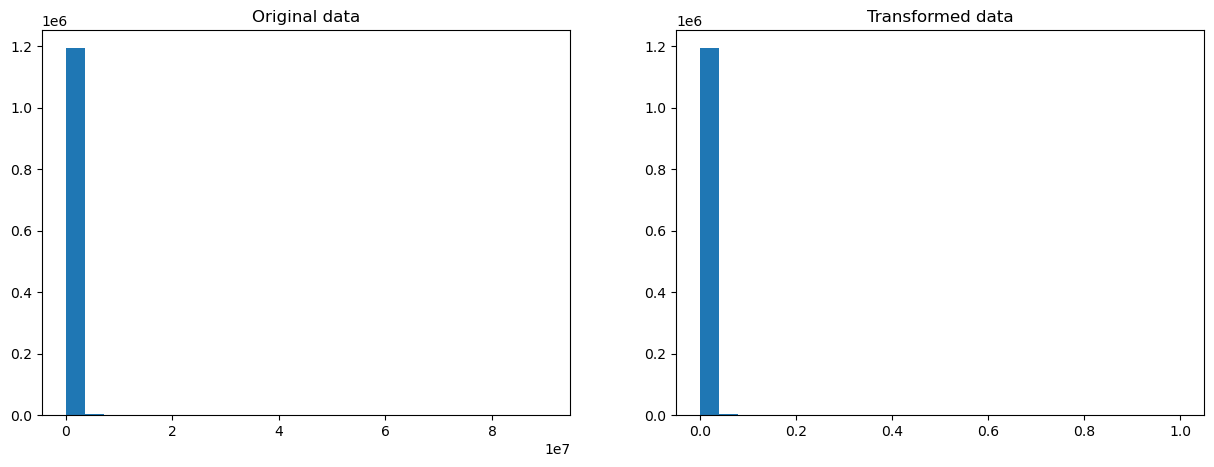



year_built


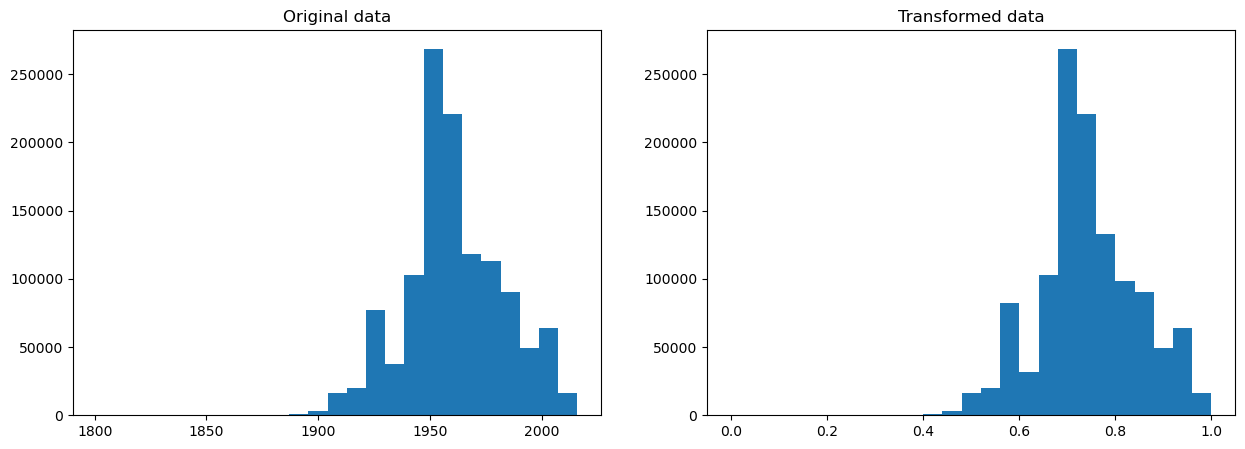



taxamount


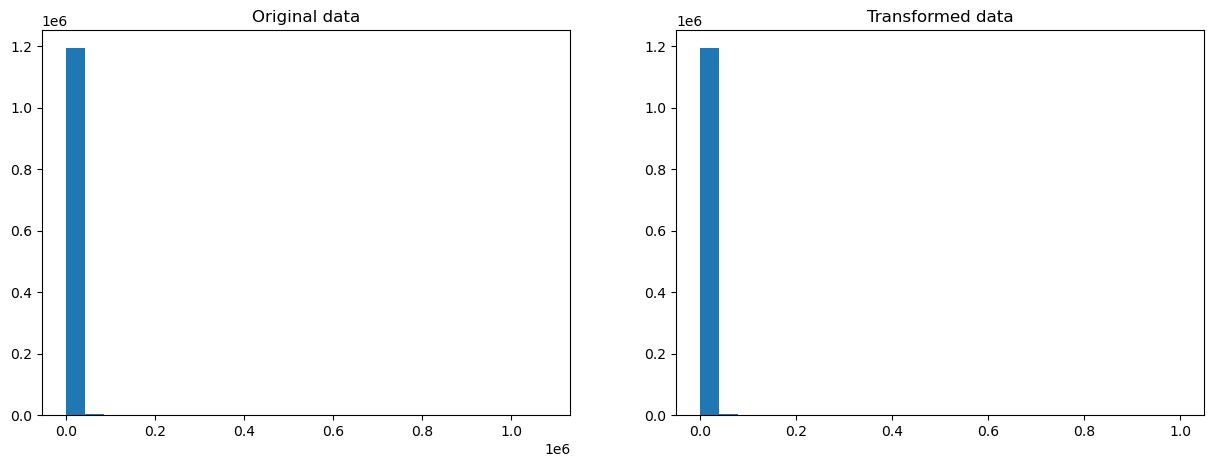



fips


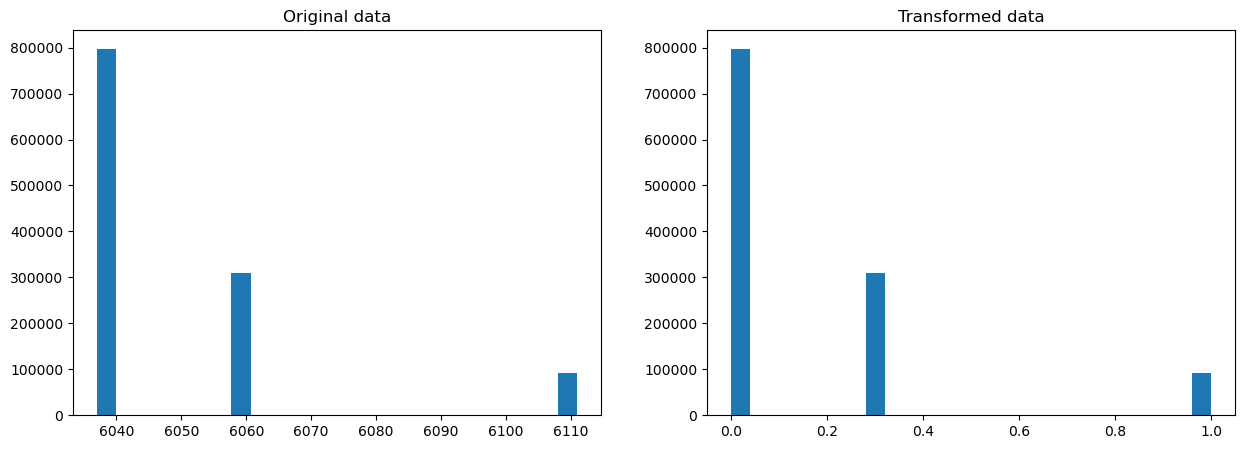

In [5]:
# assign scaler
scaler = MinMaxScaler()

for col in train.columns:
    
    # print a name of column
    print(col)
    
    # call scaler function to display graph
    get_scaler(scaler,col)
    
    # print an empty line twice
    print()
    print()


bedrooms


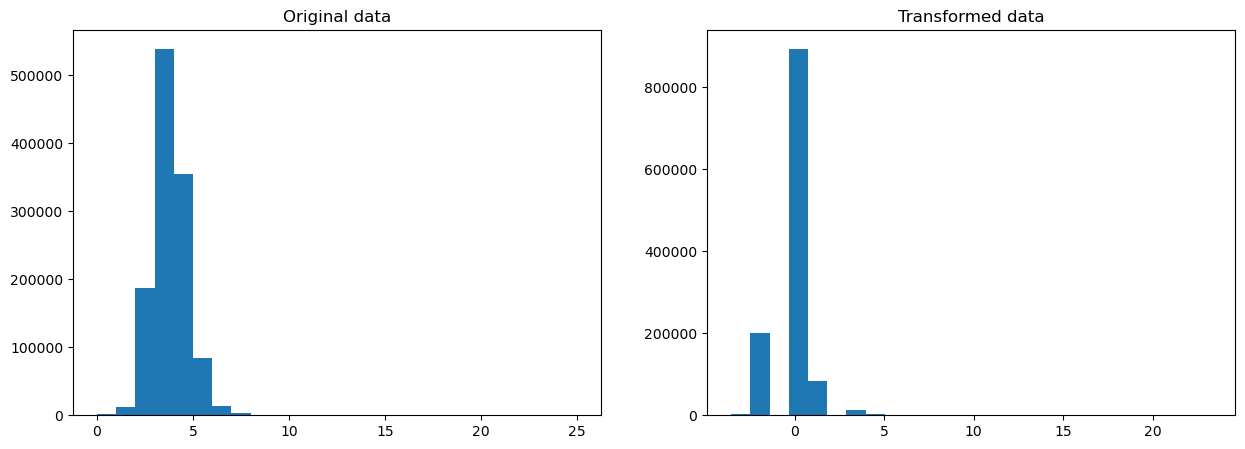



bathrooms


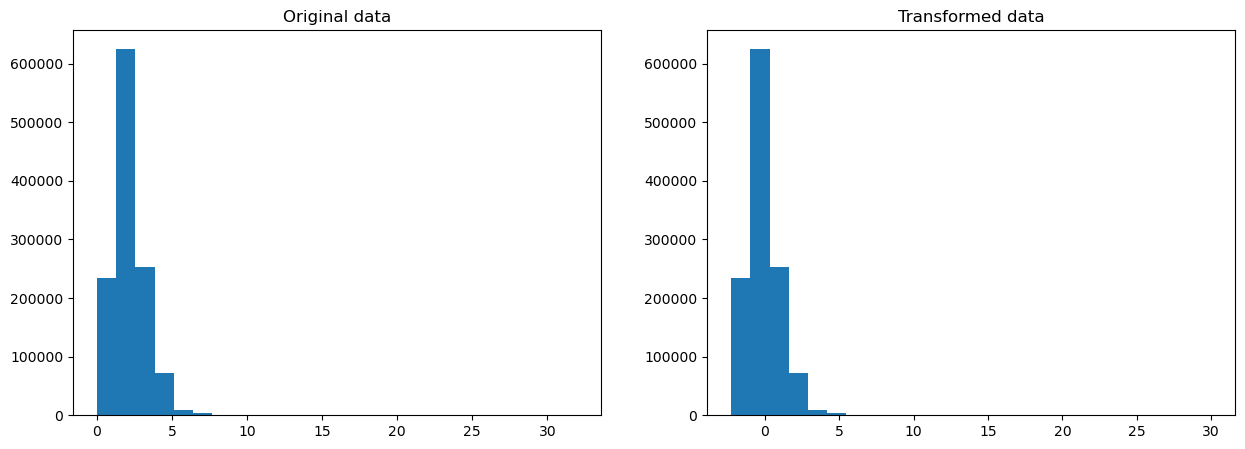



sqft


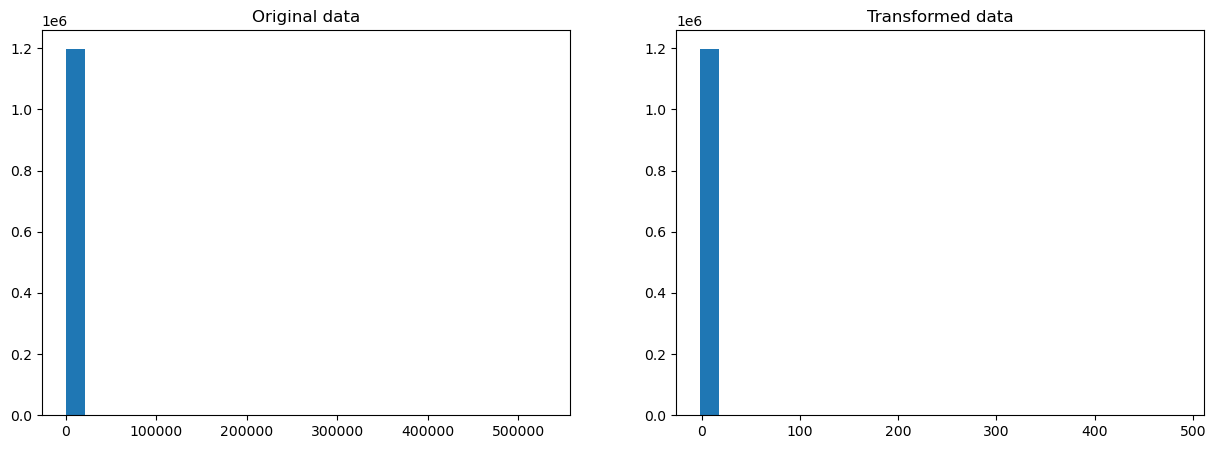



tax_value


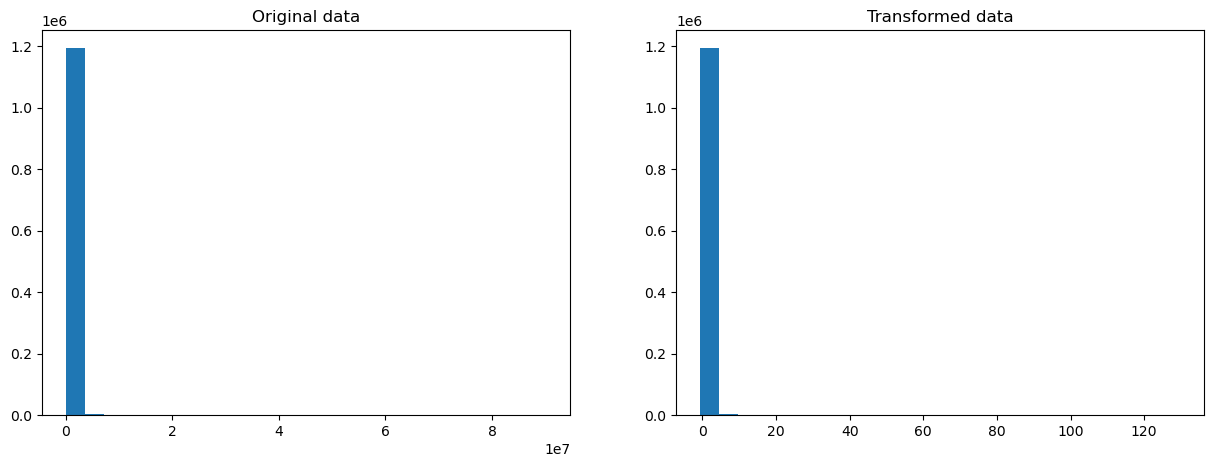



year_built


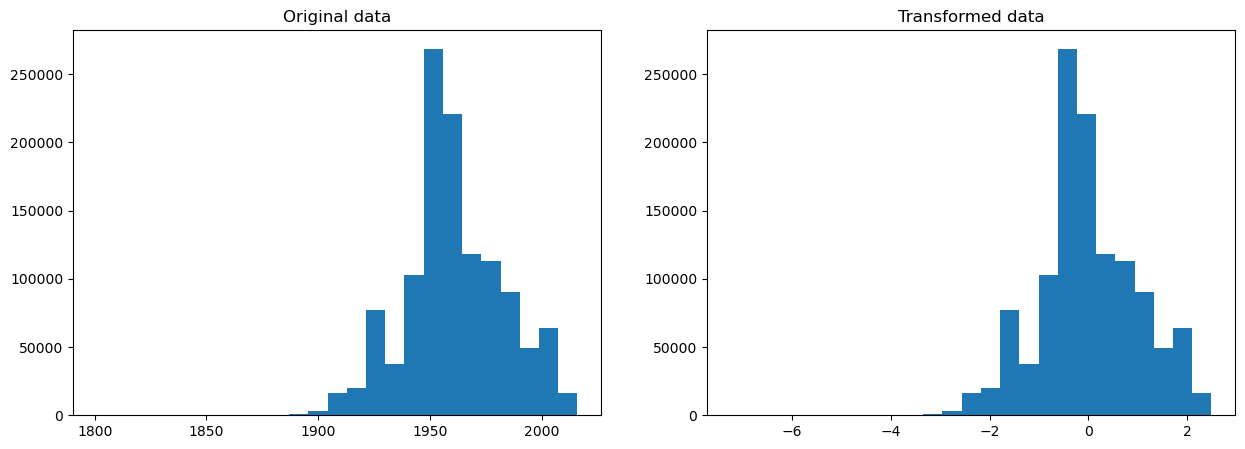



taxamount


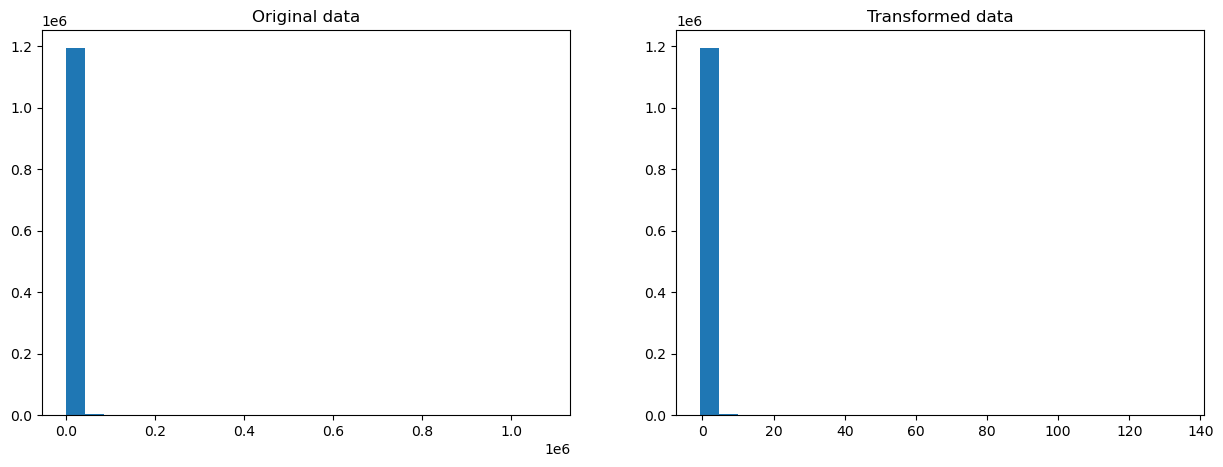



fips


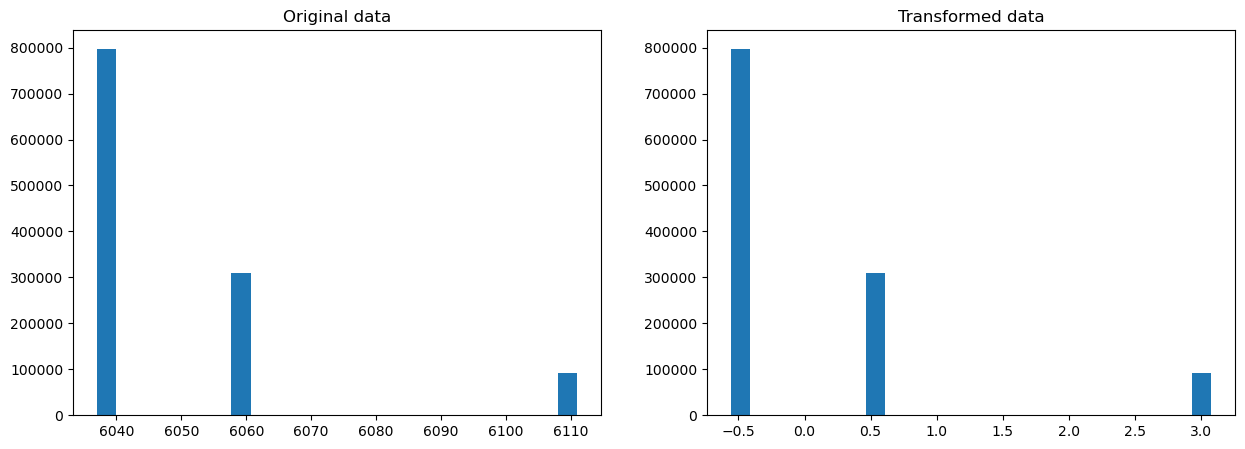

In [6]:
# assign scaler
scaler = StandardScaler()

for col in train.columns:
    
    # print a name of column
    print(col)
    
    # call scaler function to display graph
    get_scaler(scaler,col)
    
    # print an empty line twice
    print()
    print()


bedrooms


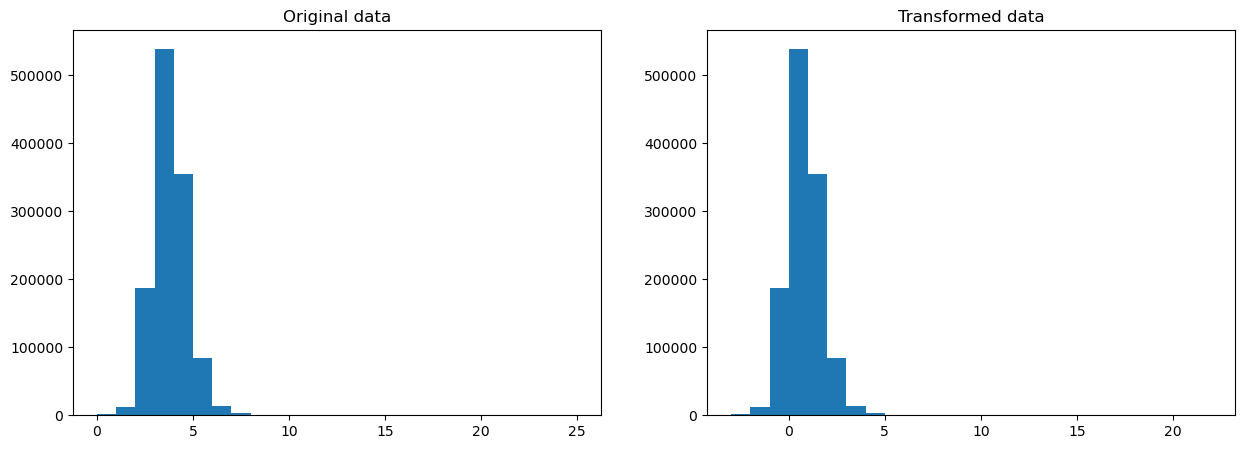



bathrooms


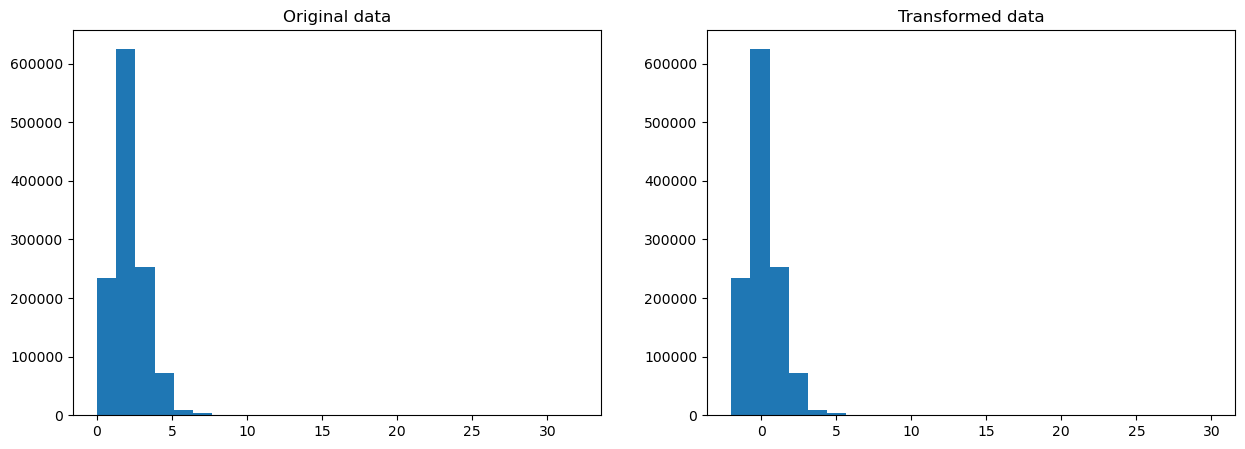



sqft


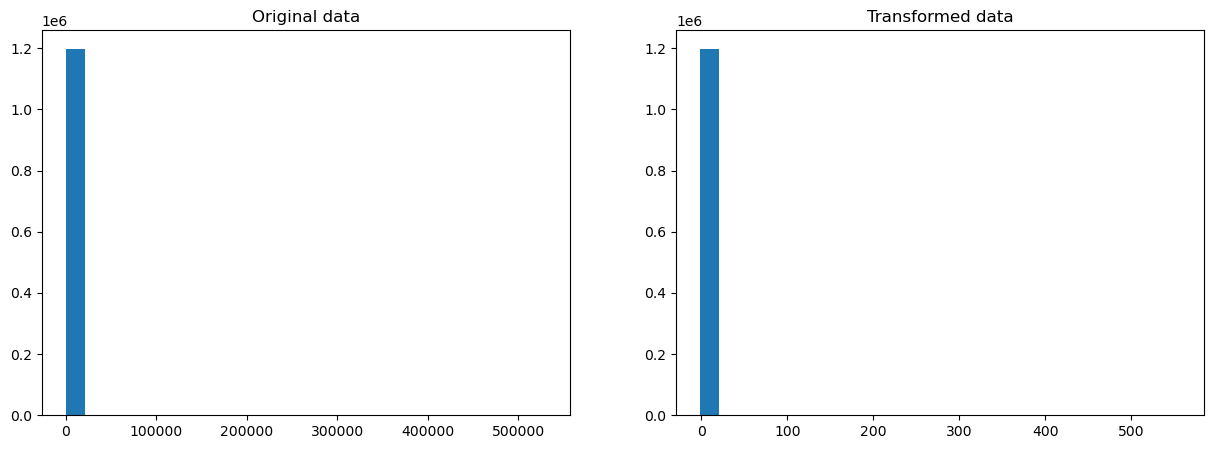



tax_value


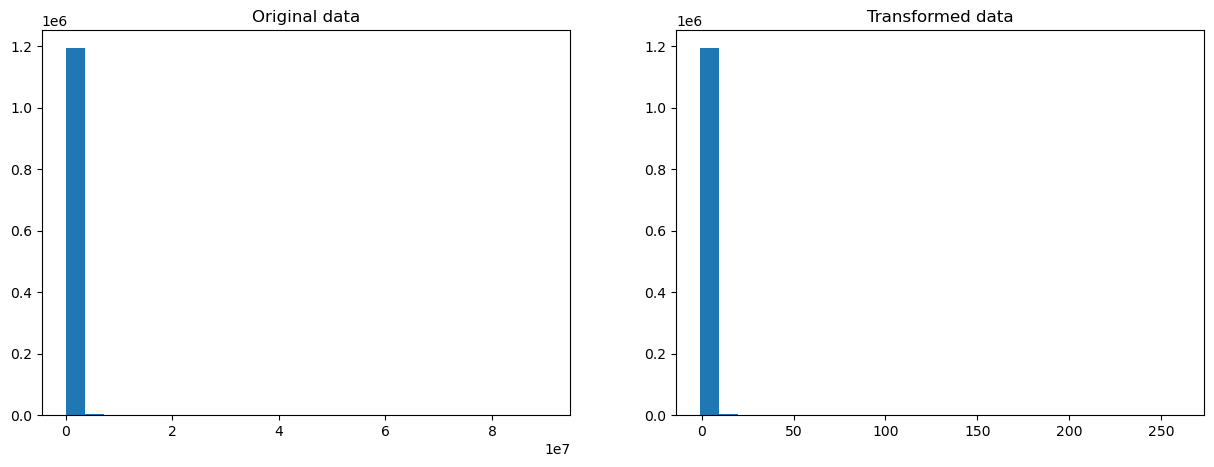



year_built


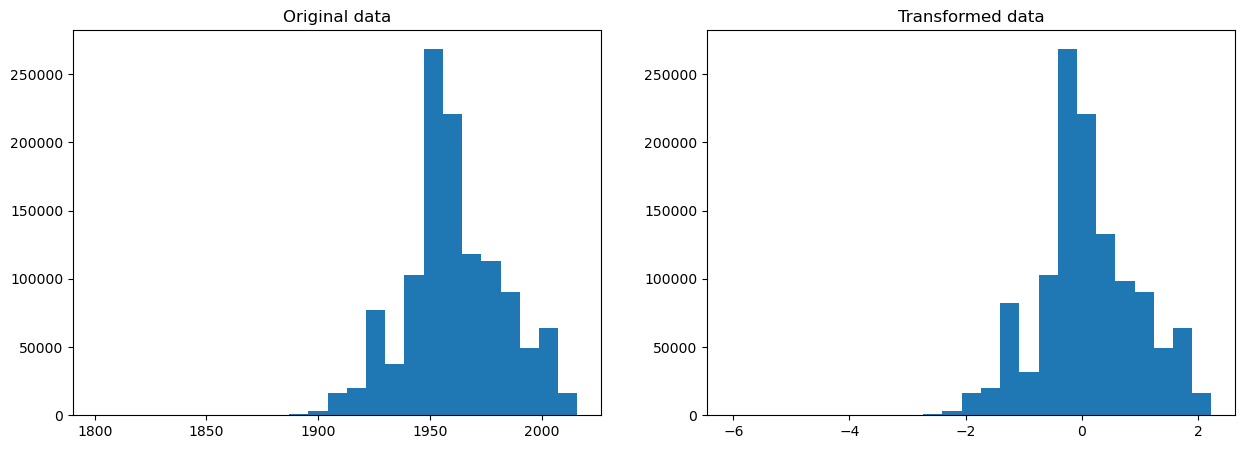



taxamount


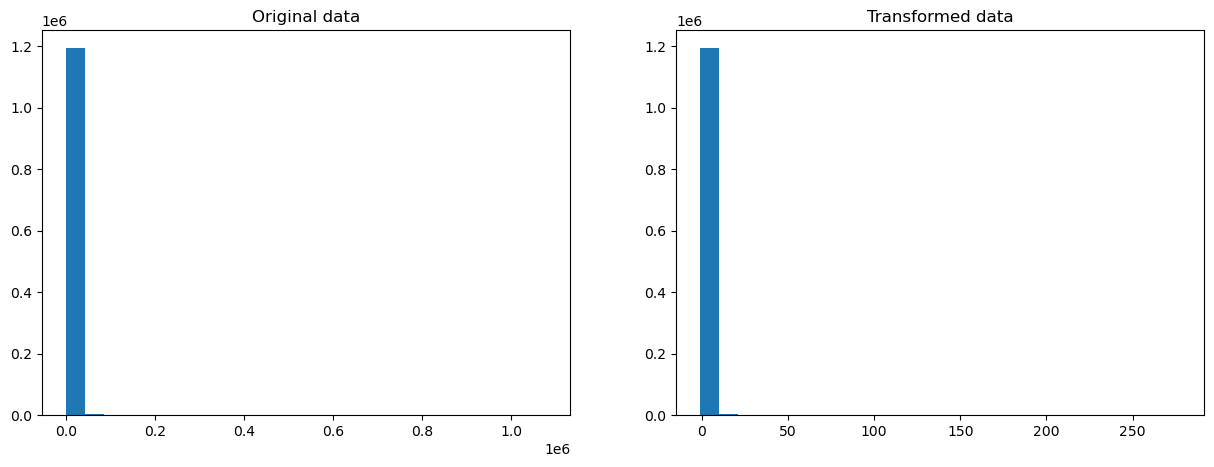



fips


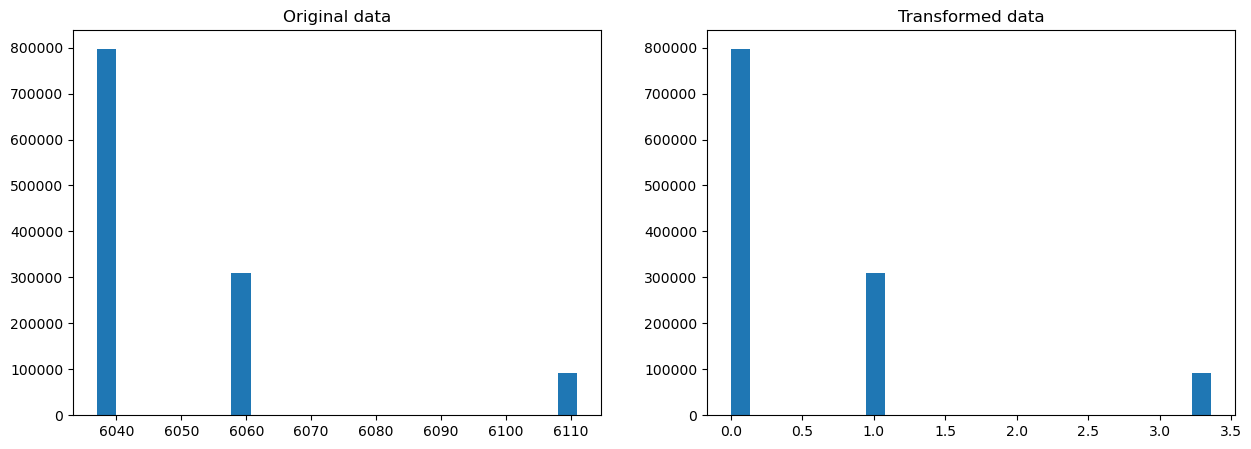

In [7]:
# assign scaler
scaler = RobustScaler()

for col in train.columns:
    
    # print a name of column
    print(col)
    
    # call scaler function to display graph
    get_scaler(scaler,col)
    
    # print an empty line twice
    print()
    print()

### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [8]:
def get_scaler_inverse(scaler, col):
    '''takes on scaler and column name and show graph of unscaled data and inverse of scaled data
    '''
    
    
    # fit scaler on train data
    scaler.fit(train[[col]])
    
    # scale data
    scaled = scaler.transform(train[[col]])
    
    # inverse scaled data
    inverse = scaler.inverse_transform(scaled)
    
    # create a new figure using figsize with parameters Width, height in inches
    plt.figure(figsize = (15,5))
    
    # graph position 1 row, 2 columns, 1 index
    plt.subplot(121)
    
    # histograph unnscaled data
    plt.hist(train[col], bins=25)
    
    # title
    plt.title('Original data')

    # graph position 1 row, 2 columns, 2 index
    plt.subplot(122)
    
    # histograph of inverse data
    plt.hist(inverse, bins=25)
    # title
    plt.title('Inverse data')

    # display figure
    plt.show()

bedrooms


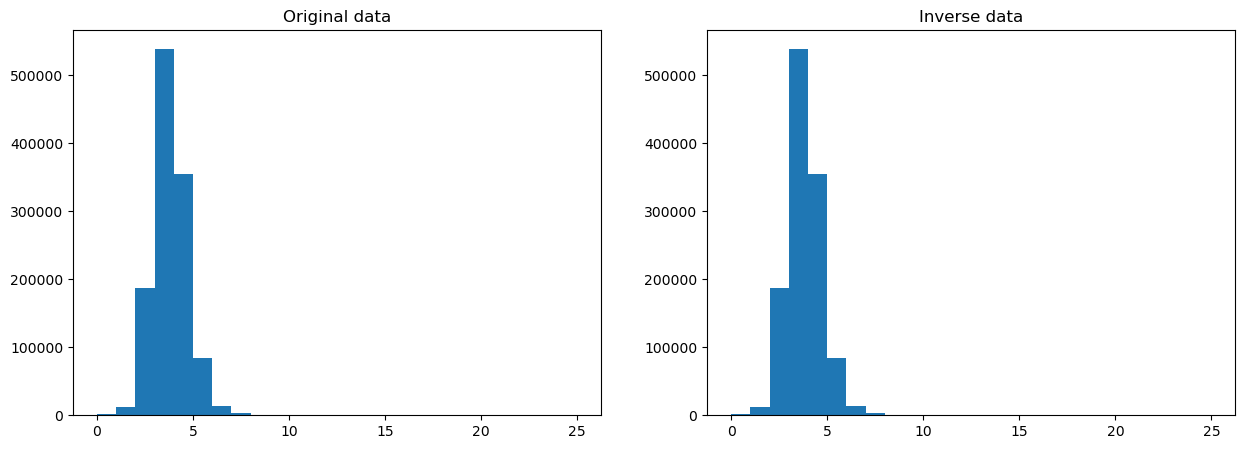



bathrooms


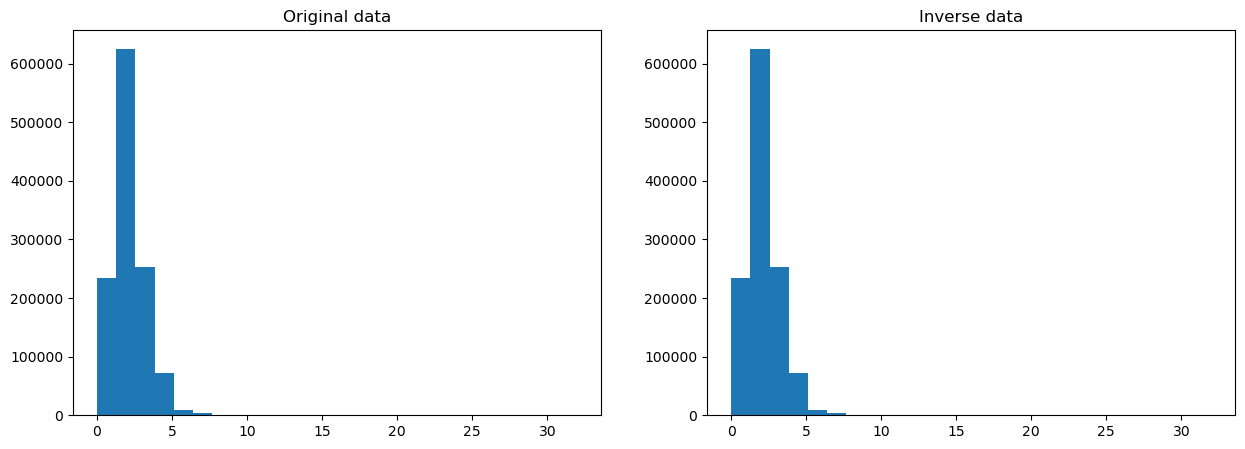



sqft


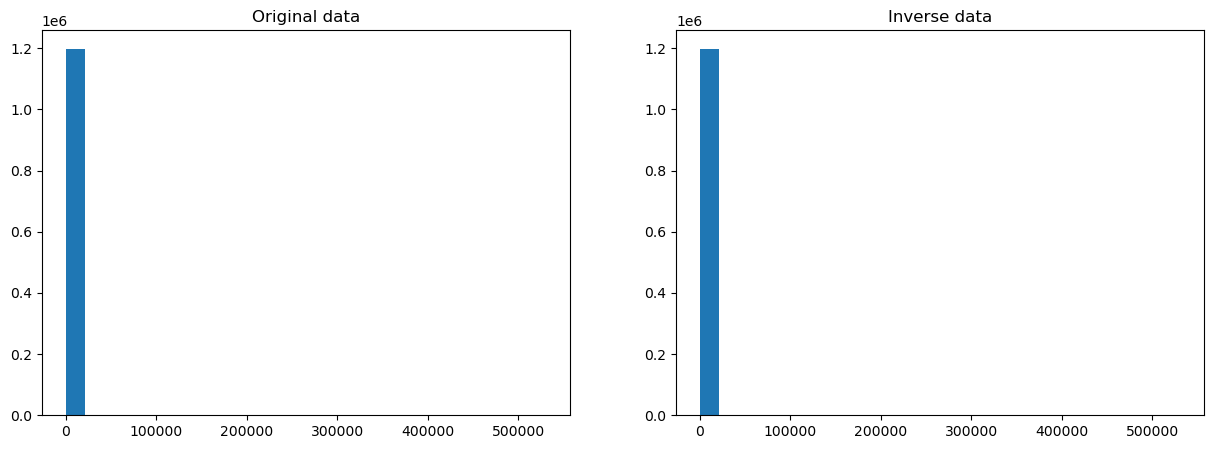



tax_value


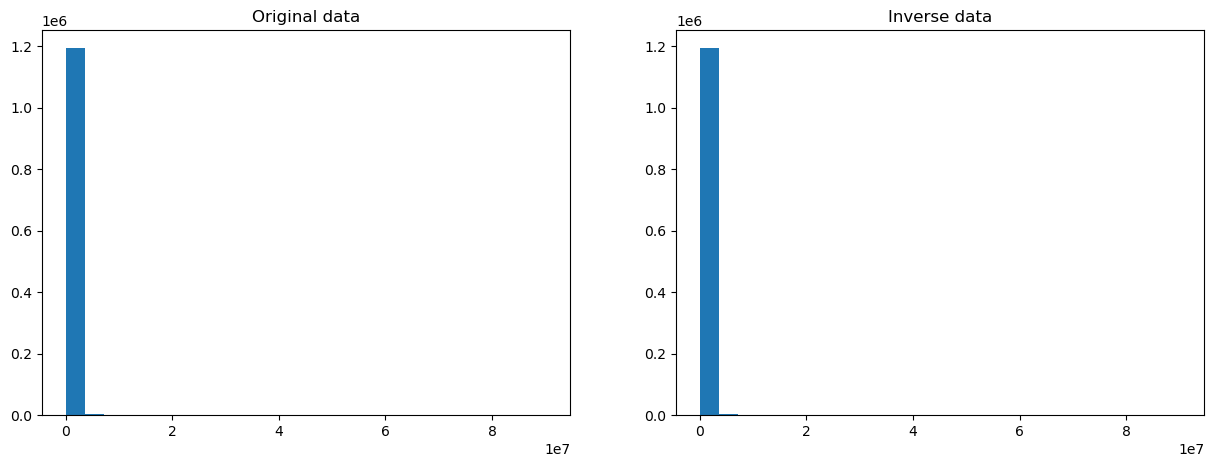



year_built


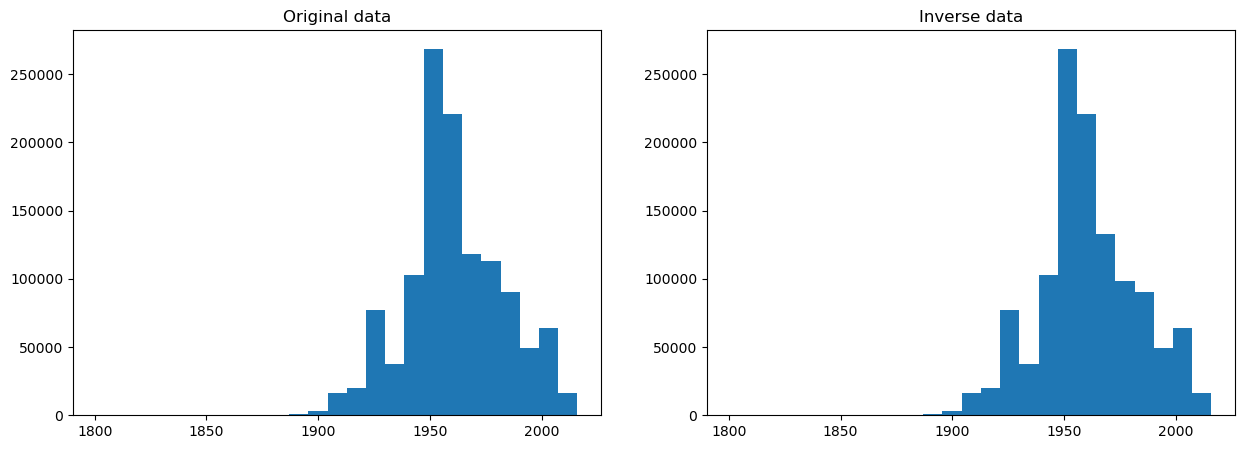



taxamount


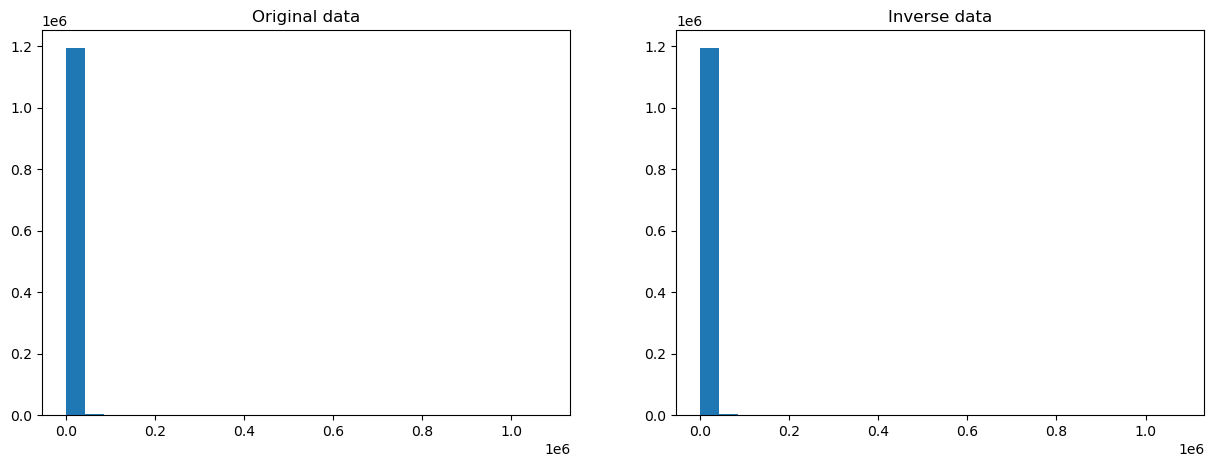



fips


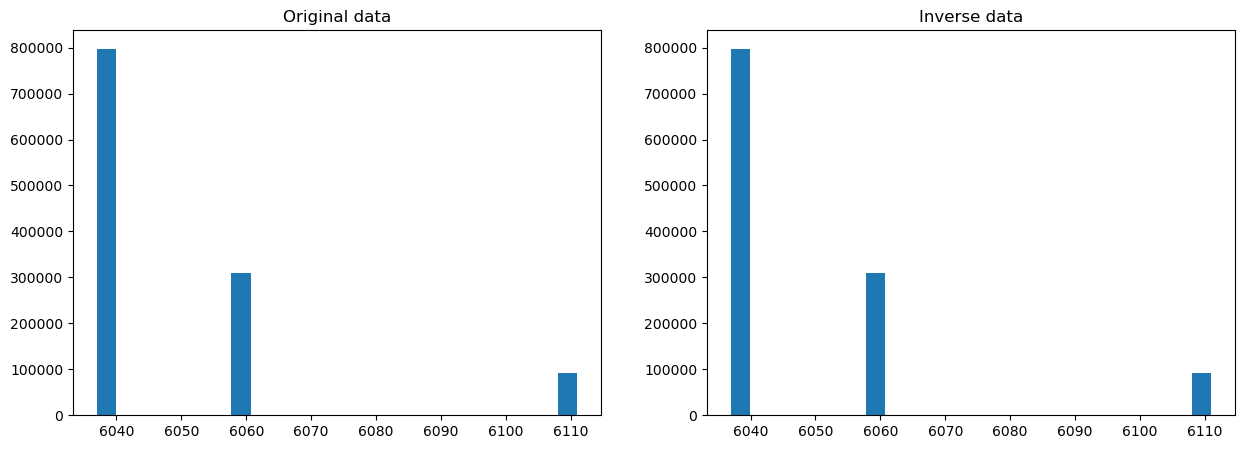

In [9]:
# assign scaler
scaler = MinMaxScaler()

for col in train.columns:
    
    # print a name of column
    print(col)
    
    # call scaler function to display graph
    get_scaler_inverse(scaler,col)
    
    # print an empty line twice
    print()
    print()

bedrooms


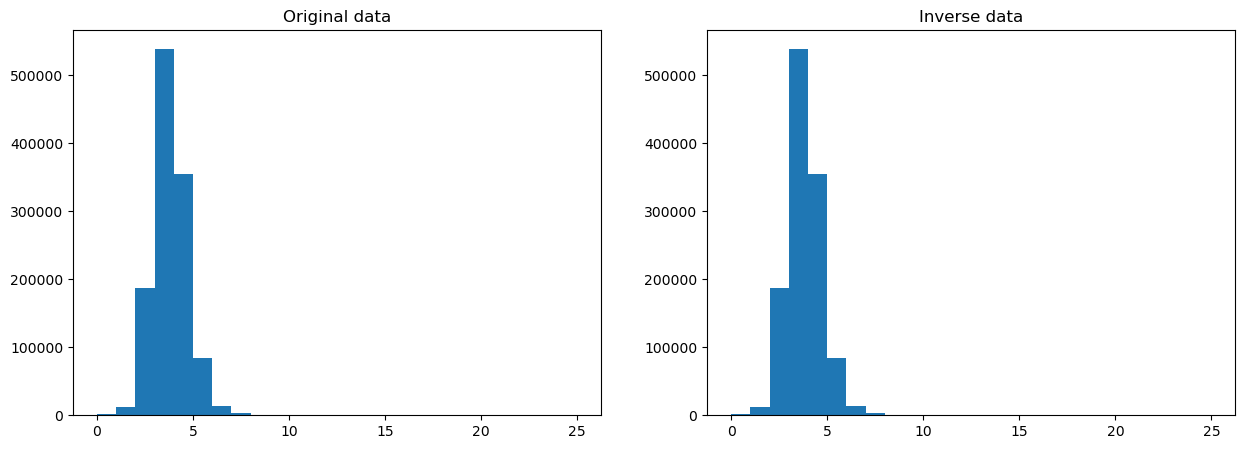



bathrooms


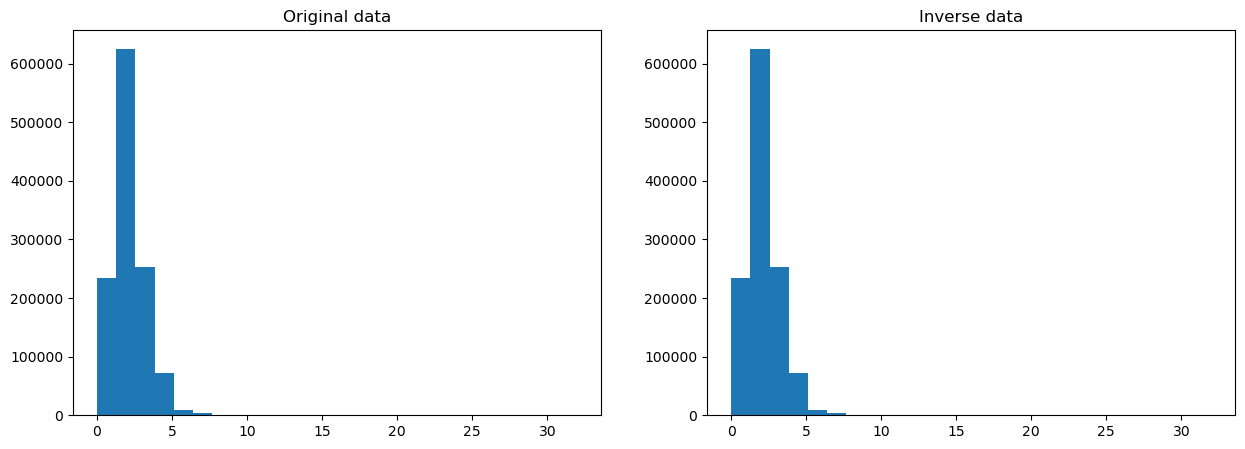



sqft


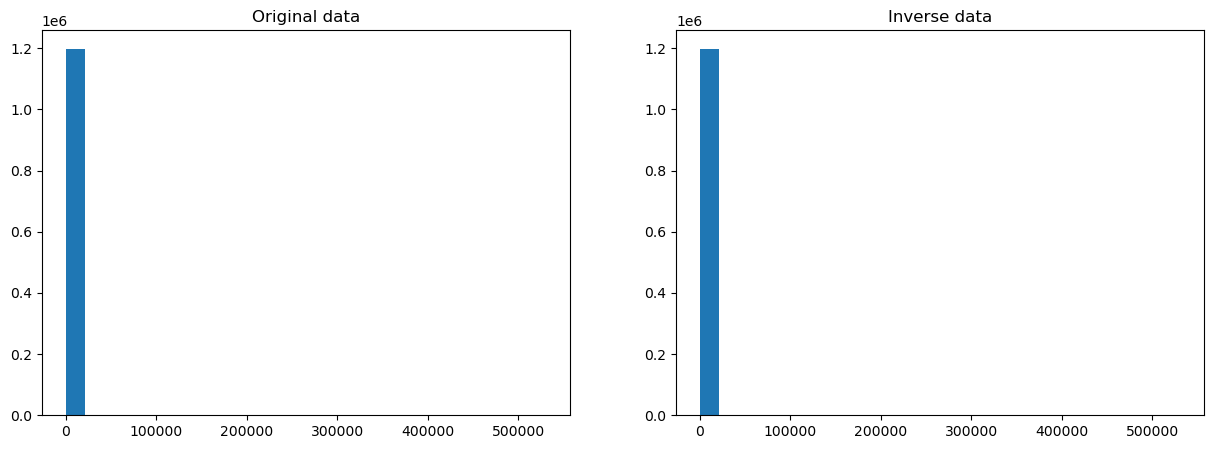



tax_value


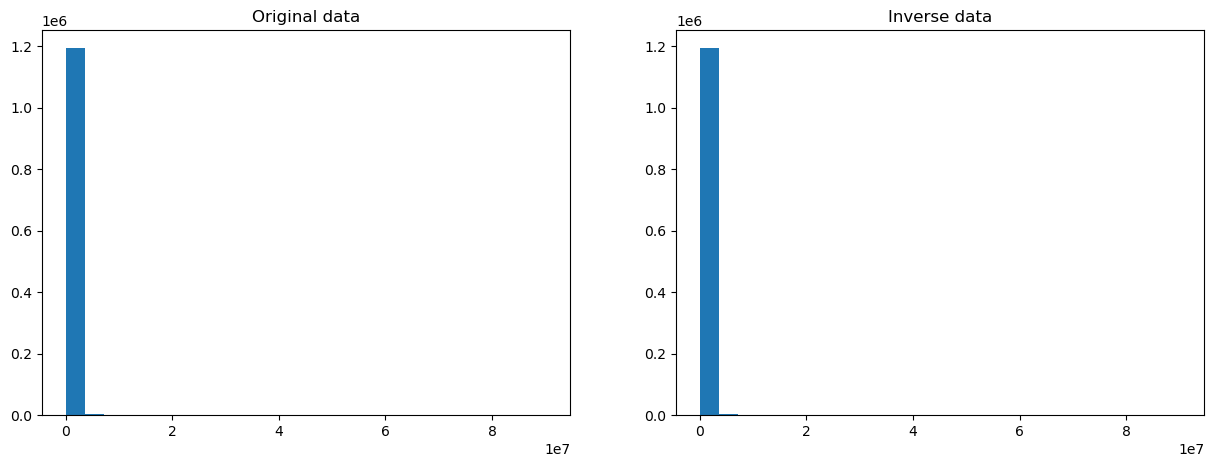



year_built


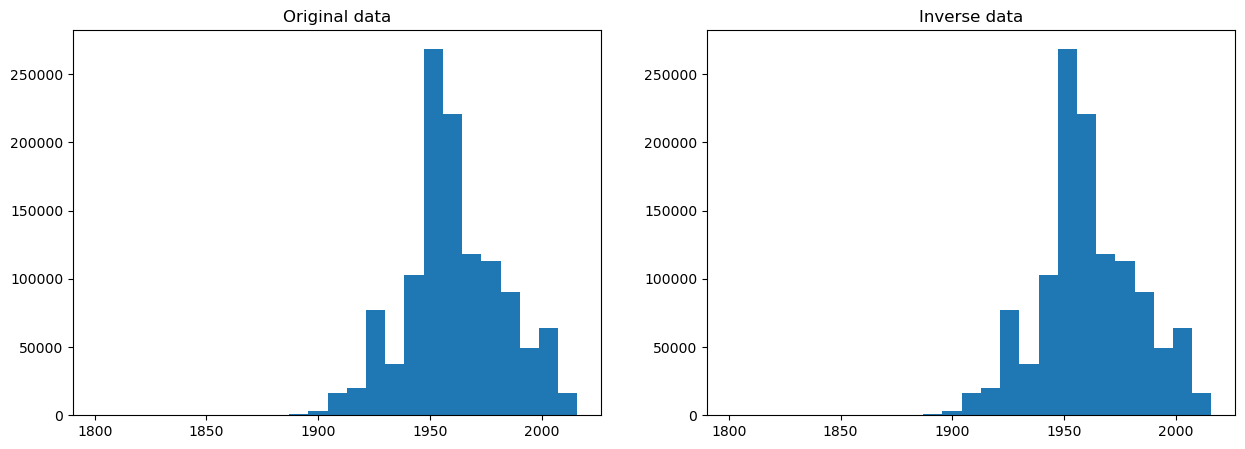



taxamount


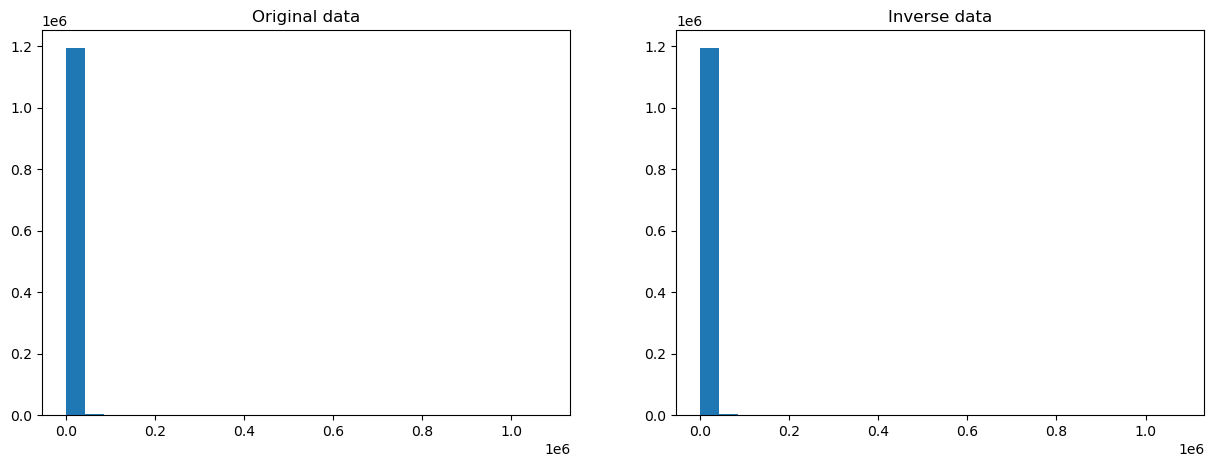



fips


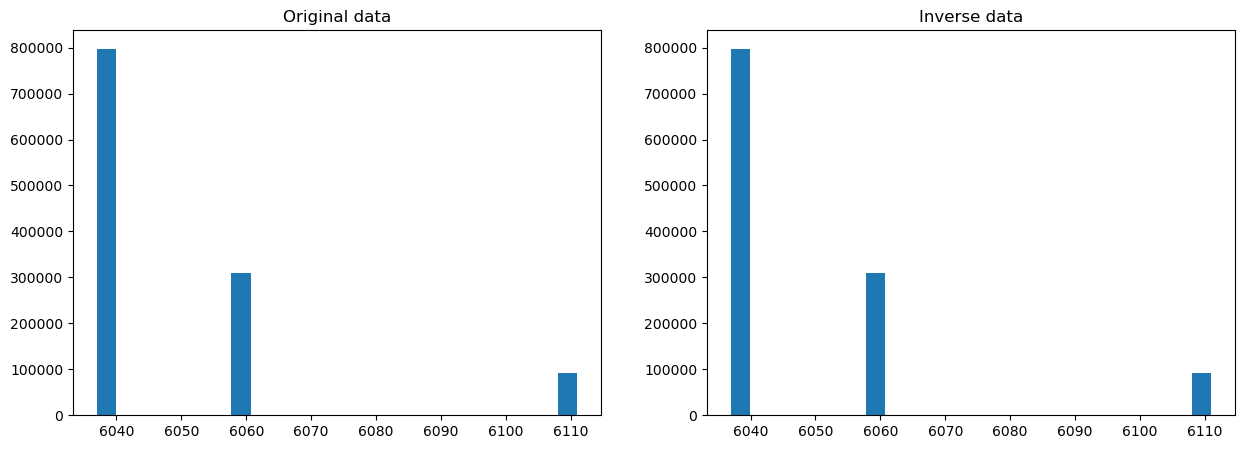

In [10]:
# assign scaler
scaler = StandardScaler()

for col in train.columns:
    
    # print a name of column
    print(col)
    
    # call scaler function to display graph
    get_scaler_inverse(scaler,col)
    
    # print an empty line twice
    print()
    print()

bedrooms


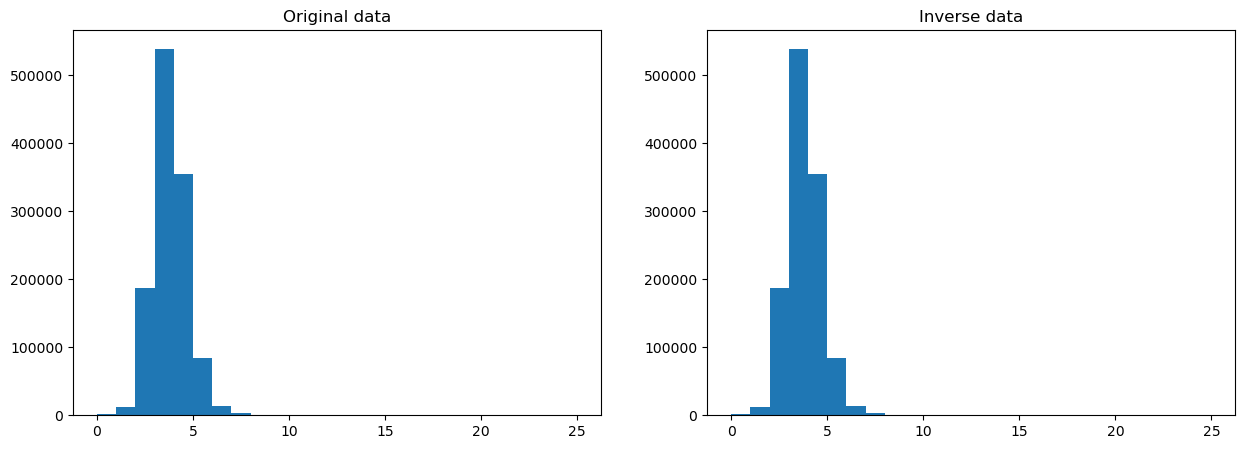



bathrooms


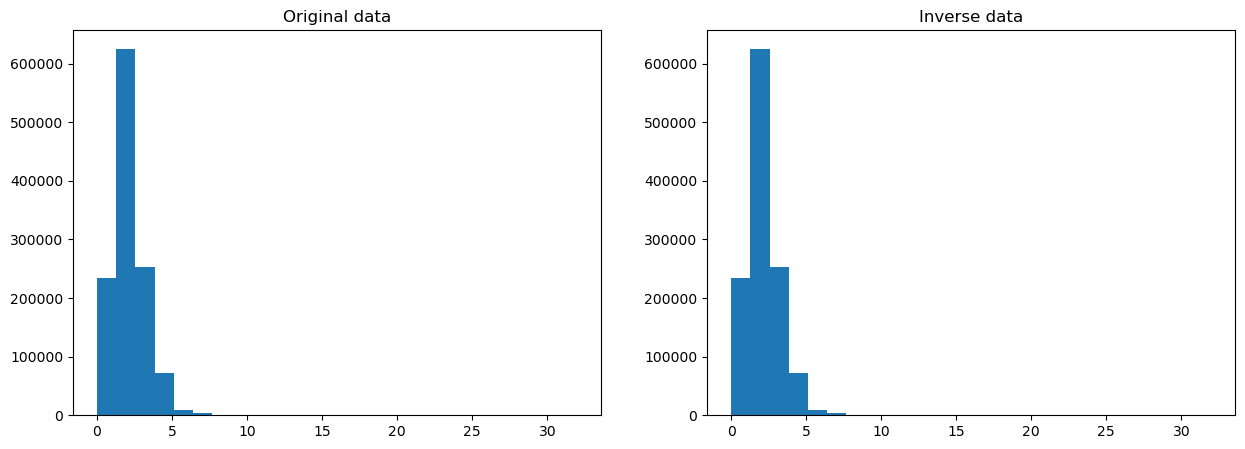



sqft


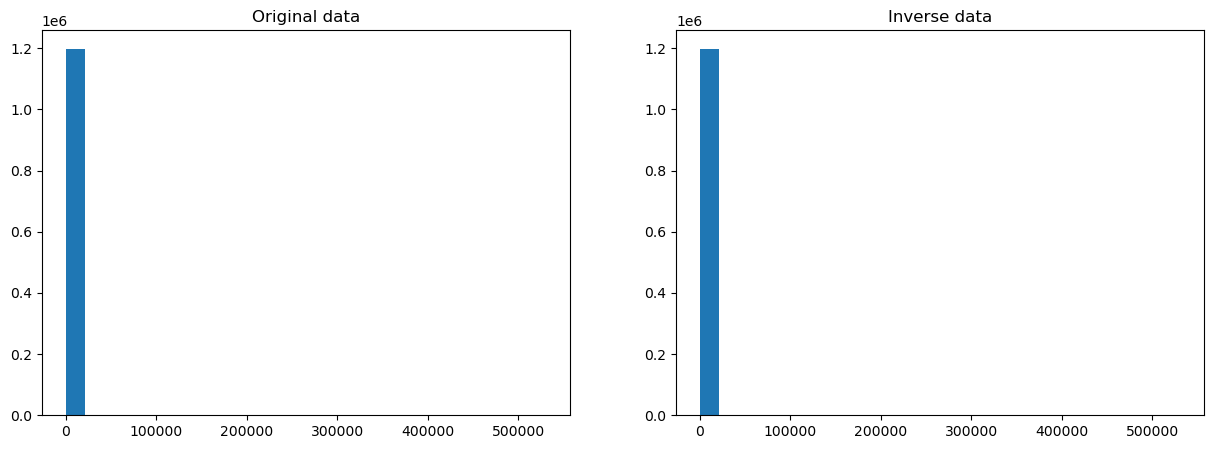



tax_value


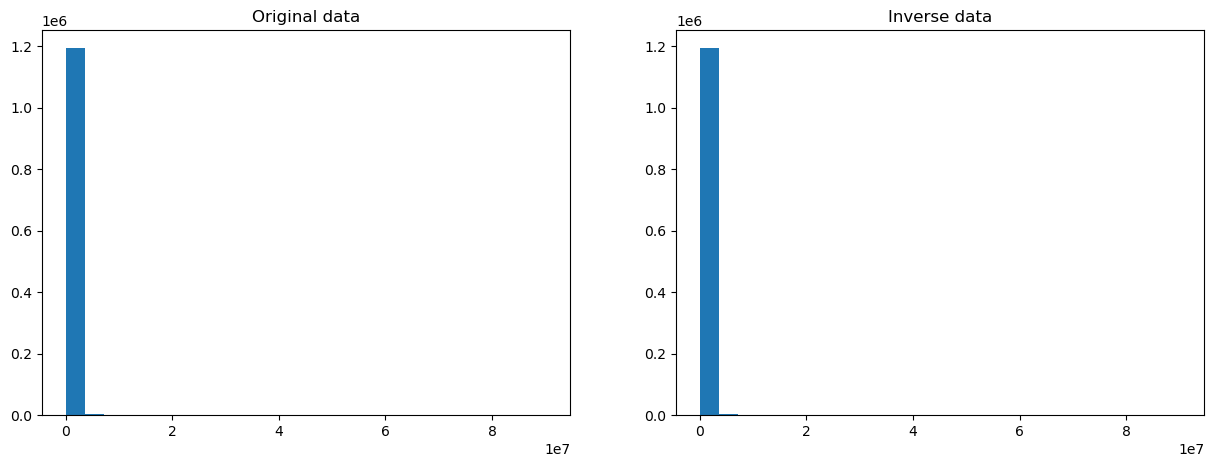



year_built


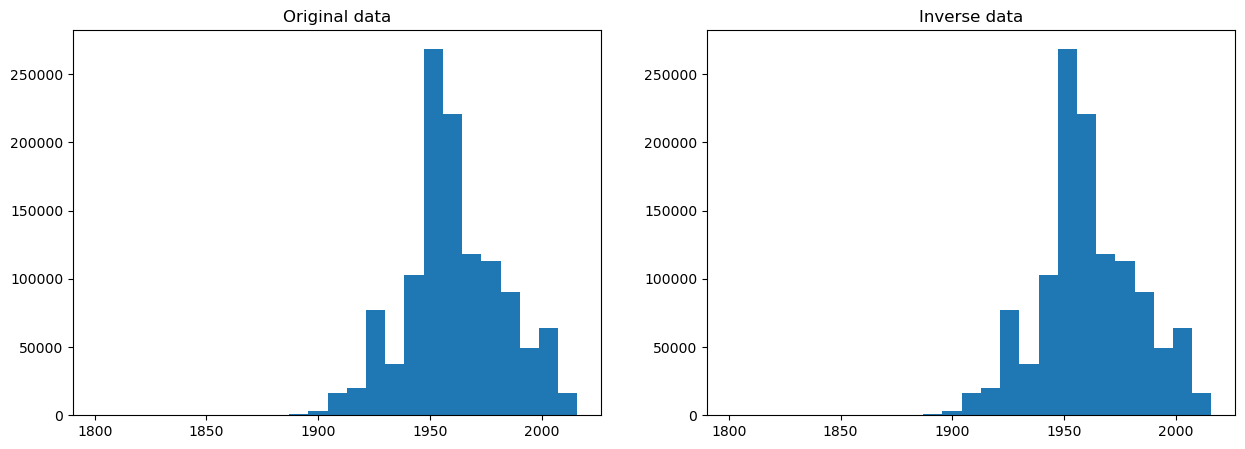



taxamount


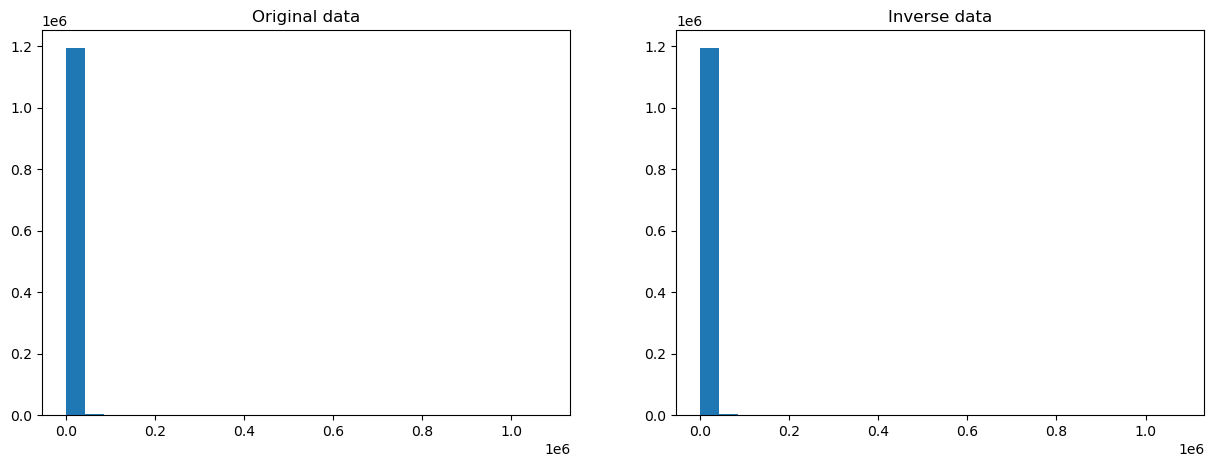



fips


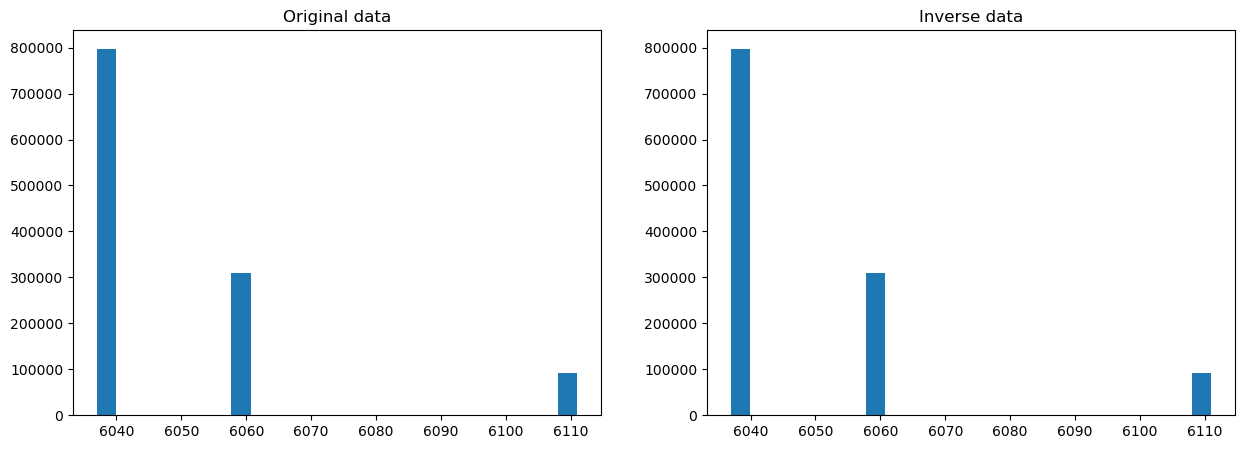

In [11]:
# assign scaler
scaler = RobustScaler()

for col in train.columns:
    
    # print a name of column
    print(col)
    
    # call scaler function to display graph
    get_scaler_inverse(scaler,col)
    
    # print an empty line twice
    print()
    print()

### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

bedrooms


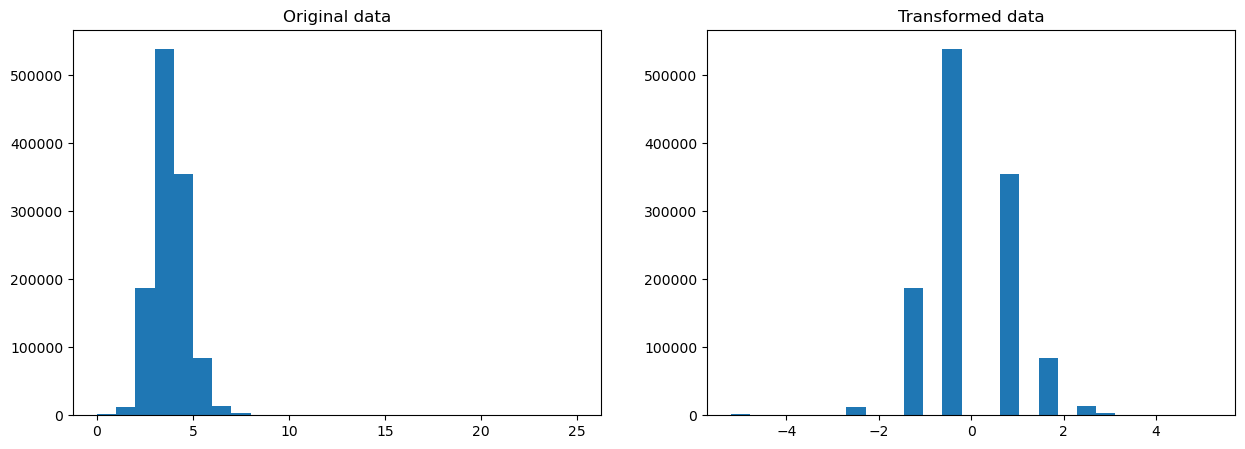



bathrooms


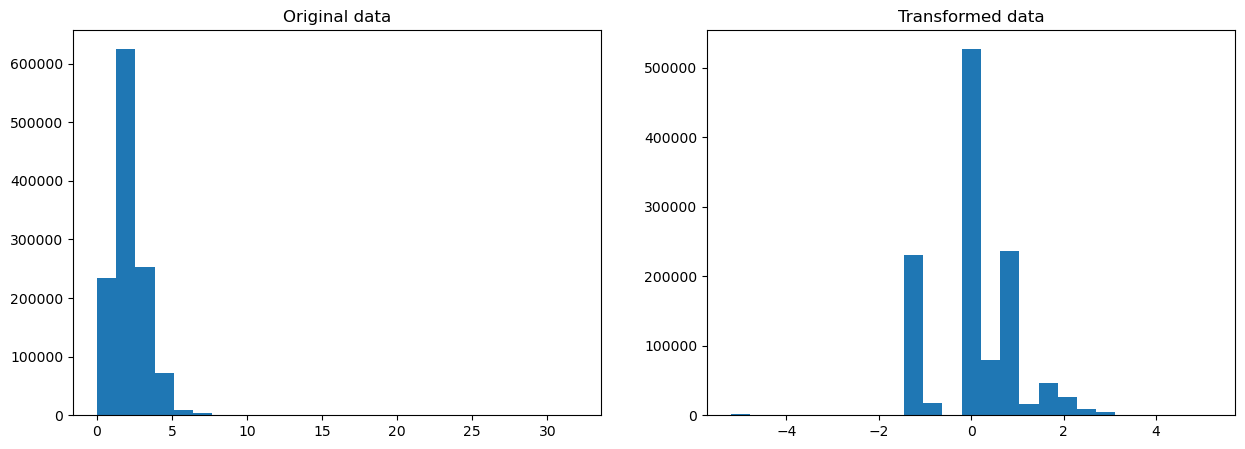



sqft


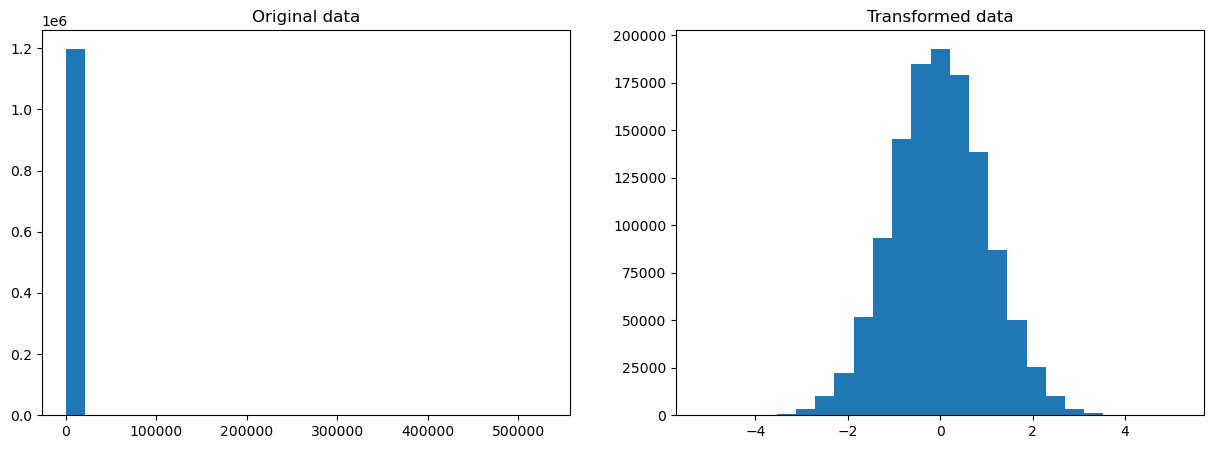



tax_value


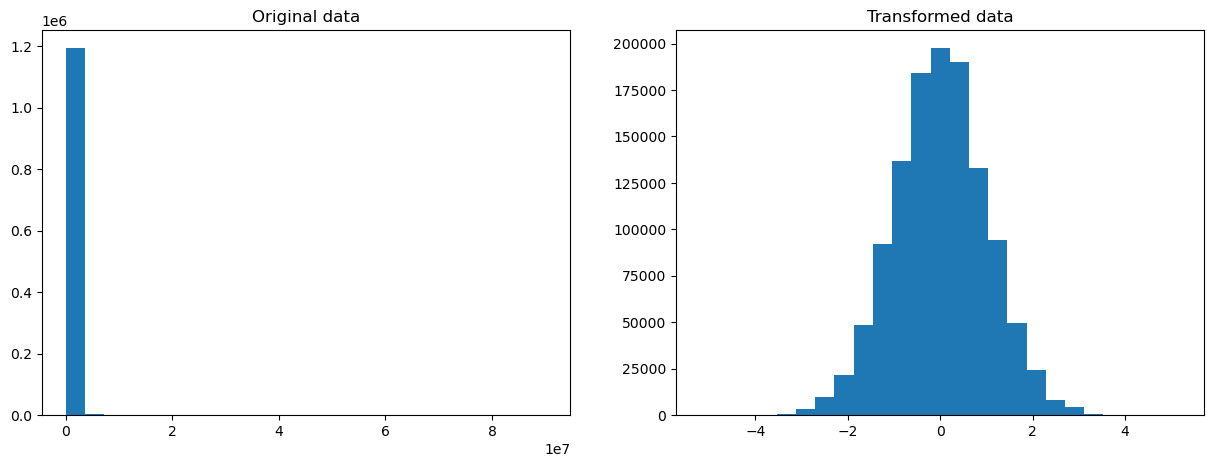



year_built


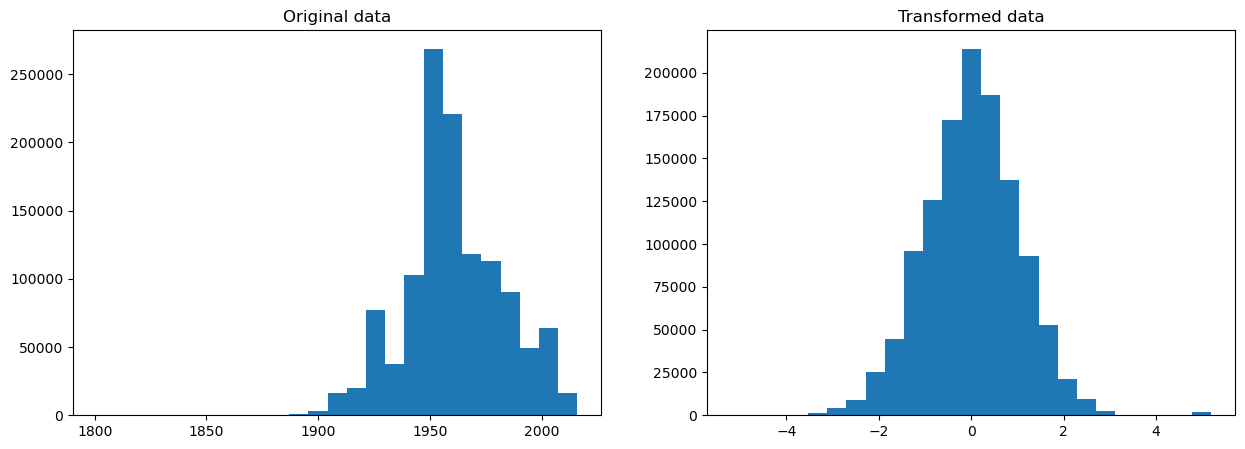



taxamount


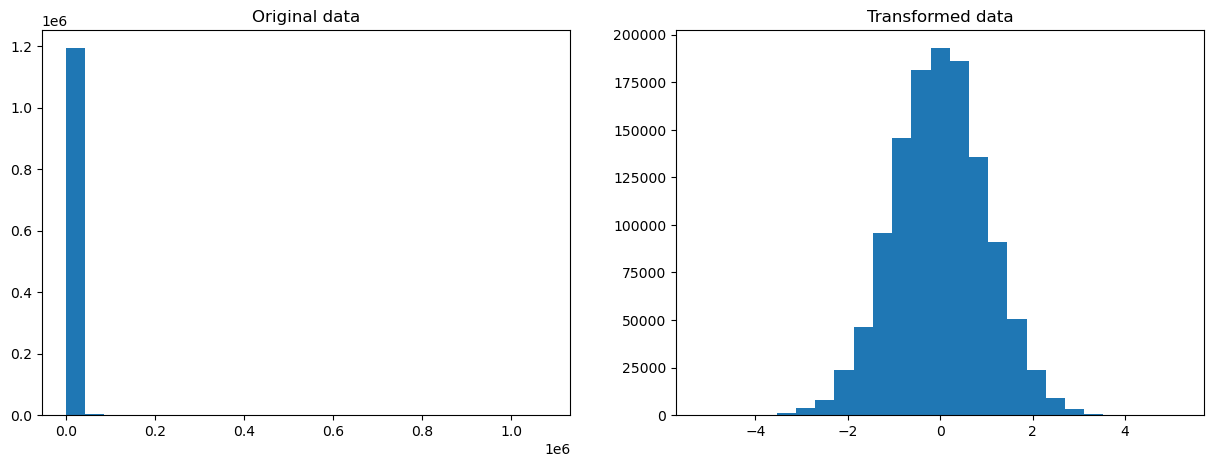



fips


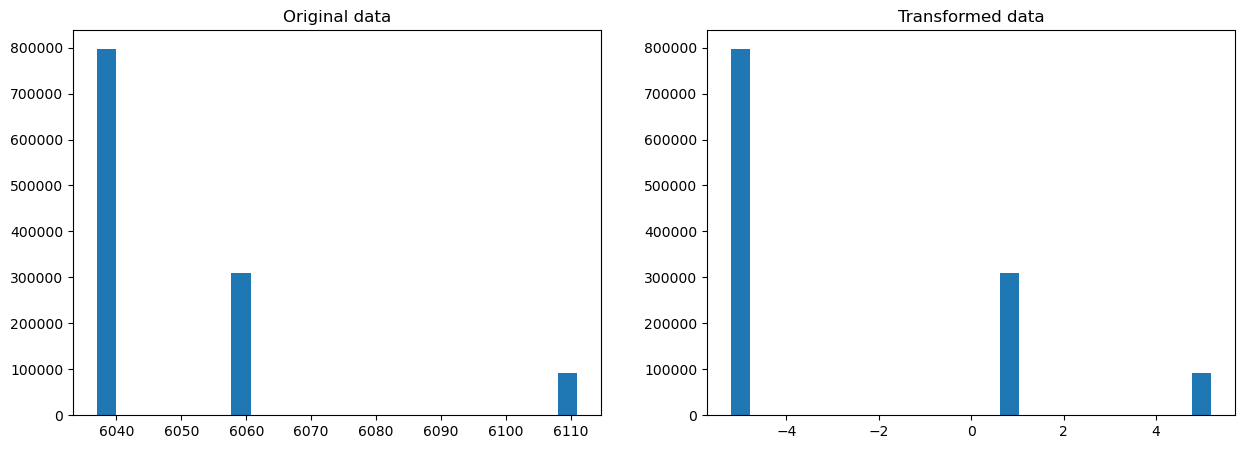

In [12]:
# assign scaler
scaler = QuantileTransformer(output_distribution='normal')

for col in train.columns:
    
    # print a name of column
    print(col)
    
    # call scaler function to display graph
    get_scaler(scaler,col)
    
    # print an empty line twice
    print()
    print()

### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

bedrooms


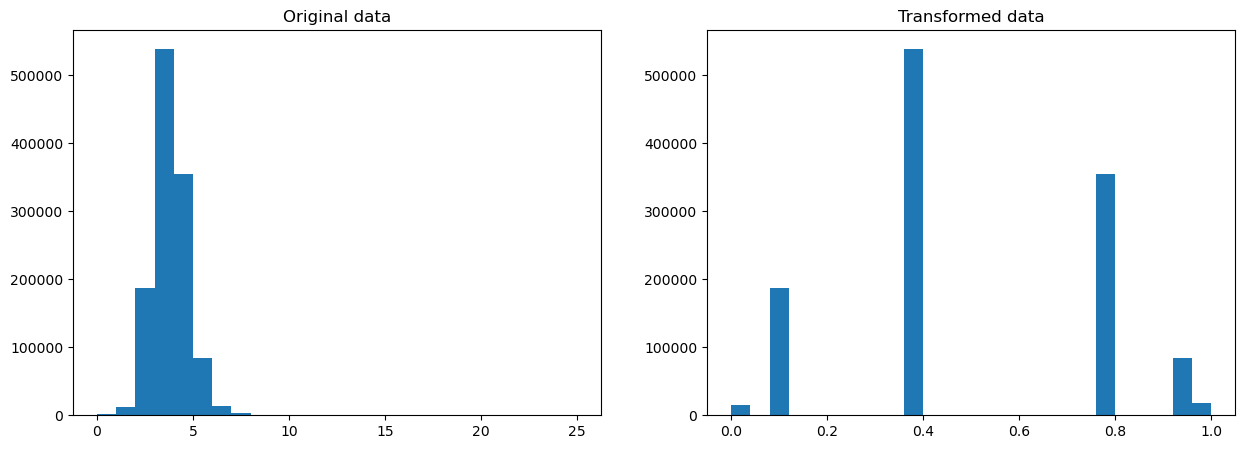



bathrooms


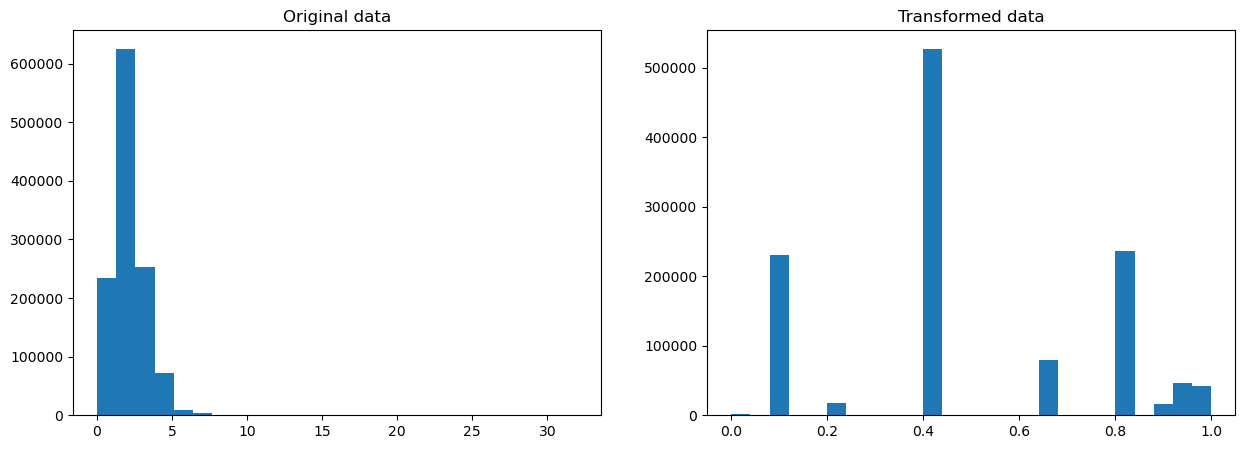



sqft


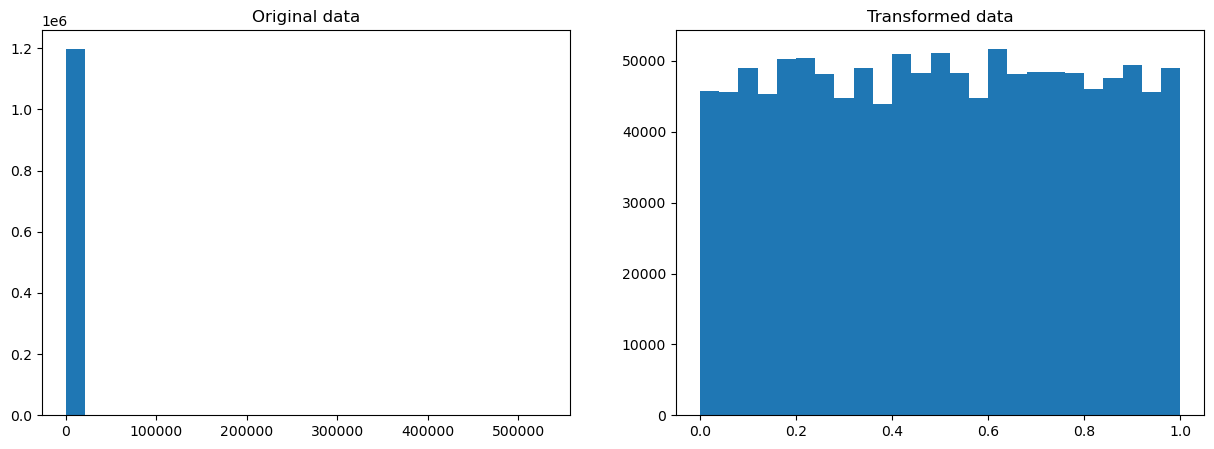



tax_value


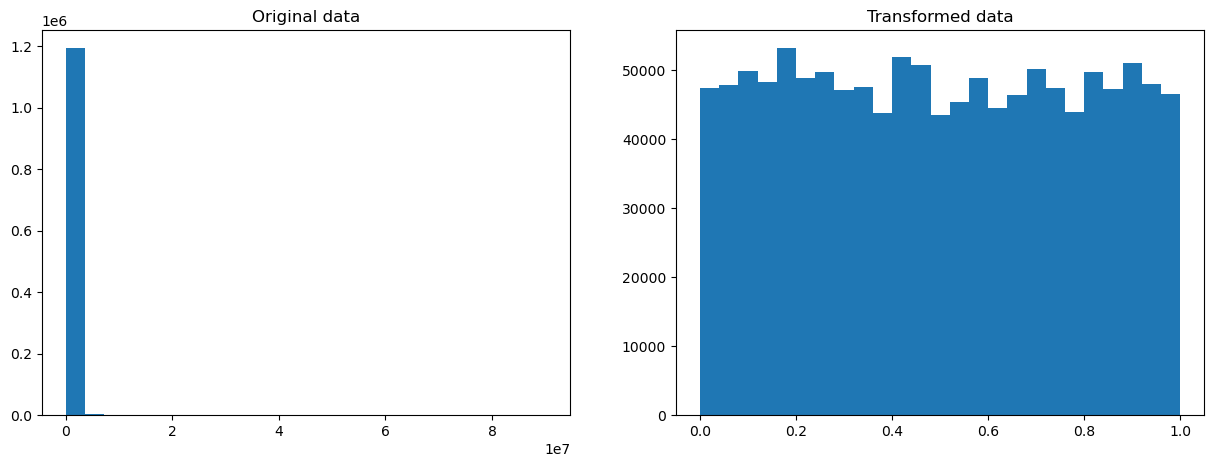



year_built


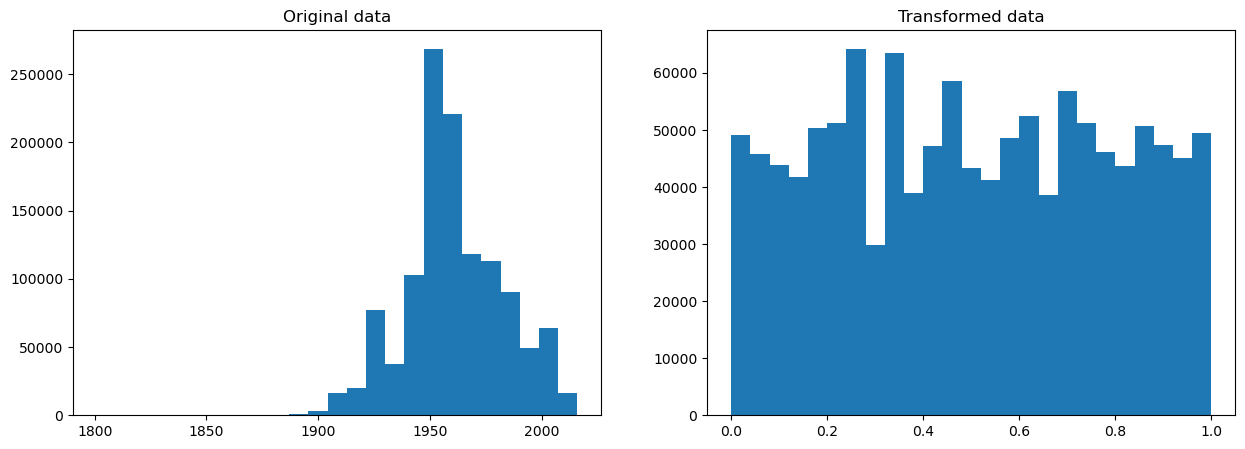



taxamount


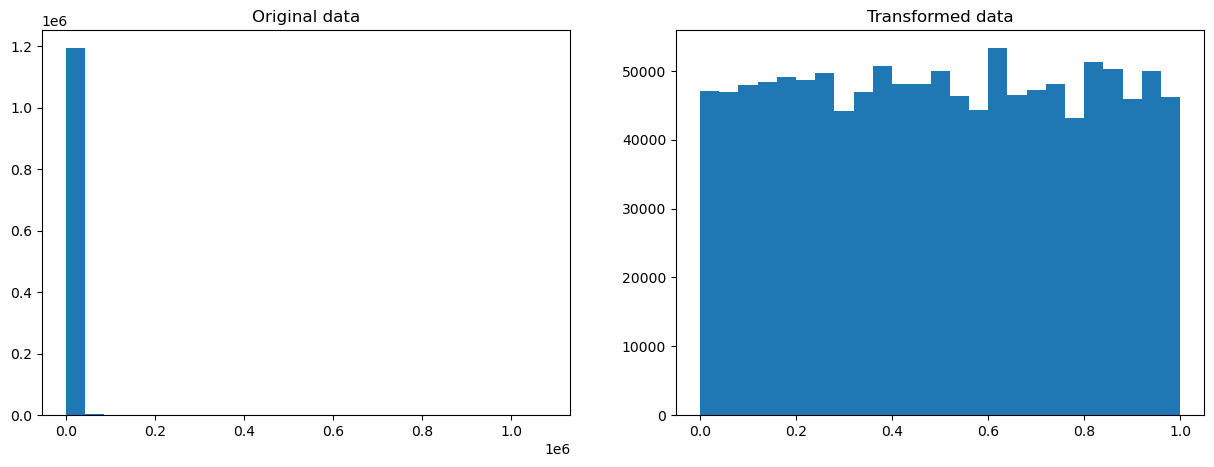



fips


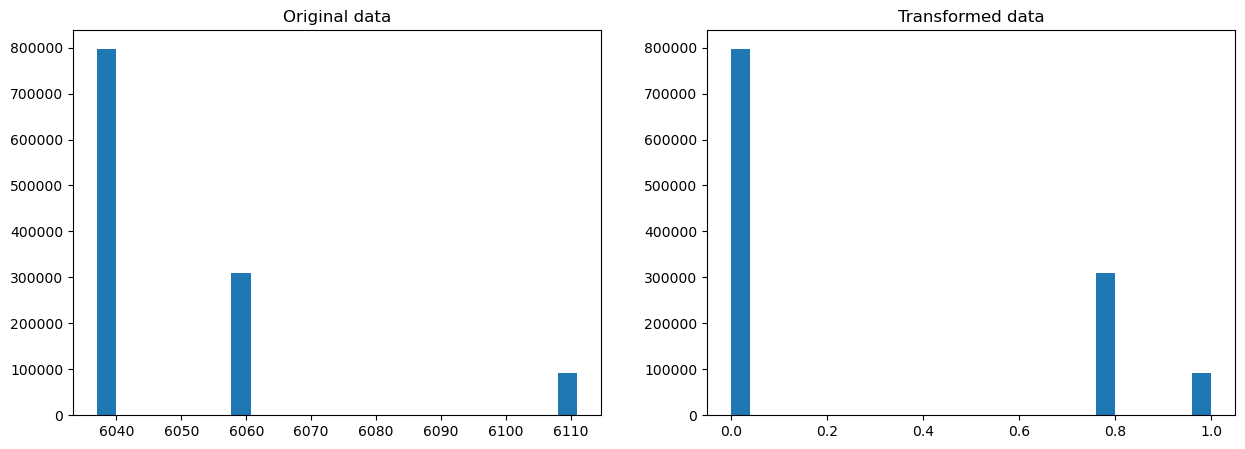

In [13]:
# assign scalar
scaler = QuantileTransformer()

for col in train.columns:
    
    # print a name of column
    print(col)
    
    # call scaler function to display graph
    get_scaler(scaler,col)
    
    # print an empty line twice
    print()
    print()

### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [14]:
# create a list with names of columns
# column_names = train.columns.tolist()
# column_names

In [15]:
def prep_scale(train,validate,test):
    '''takes train, validate, and test data
    return scaled train, validate and test data
    '''
    
    # create a list with names of columns
    col = train.columns.tolist()
    
    # assing a scaler
    scaler = RobustScaler()
    
    # fit scaler on train data
    scaler.fit(train[col])

    # scale
    X_train_scaled = scaler.transform(train[col])

    X_validate_scaled = scaler.transform(validate[col])
  

    X_test_scaled = scaler.transform(test[col])


    return X_train_scaled, X_validate_scaled, X_test_scaled

In [16]:
# call a function prep_scale to get scaled data
X_train_scaled, X_validate_scaled, X_test_scaled= prep_scale(train,validate,test)

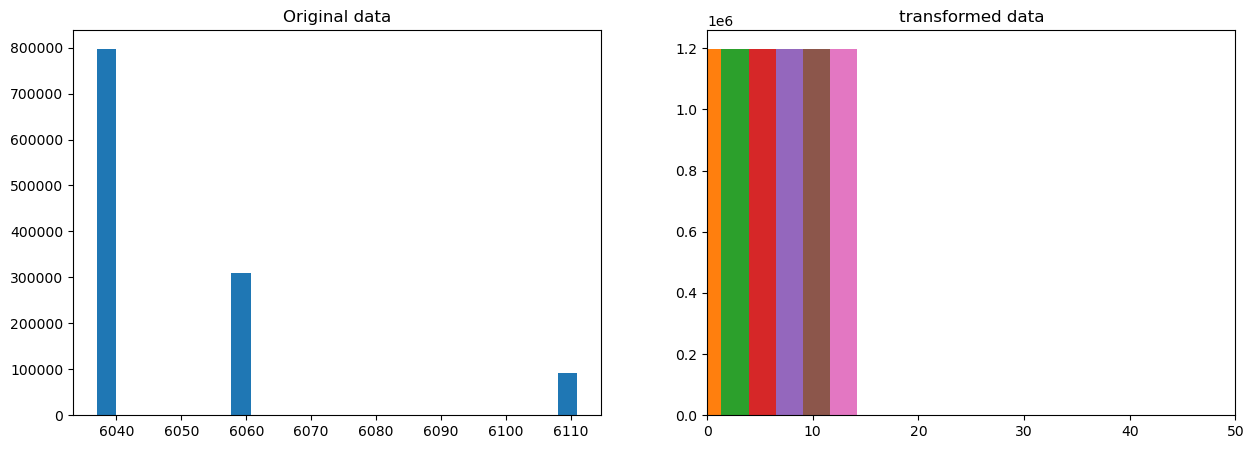

In [17]:

# create a new figure using figsize with parameters Width, height in inches
plt.figure(figsize = (15,5))
    
# graph position 1 row, 2 columns, 1 index
plt.subplot(121)

# histograph unnscaled data
plt.hist(train[col], bins=25)

# title
plt.title('Original data')

# graph position 1 row, 2 columns, 2 index
plt.subplot(122)

# histograph of scaled data
plt.hist(X_train_scaled, bins=25)
# title
plt.title('transformed data')

# limit x-axis
plt.xlim(0,50)

# display figure
plt.show()